Big data process script for Zhang et al. (2024) ESR: Yinggang Zhang(ygzhang@nigpas.ac.cn)

# Preliminarily summary the DOUNCEraq and plot its distributions

## Creat an preliminary summary for the DOUNCEraq

In [1]:
# Obtain the DOUCNEraq list from the DATABASE

import os

# the dirctory where we save the DOUNCE data
DATA_directory = './Database/C_isotopes/'

DOUNCE_filelist = []

for xlsx in os.listdir(DATA_directory):
    if xlsx.endswith('xlsx'):
        DOUNCE_filelist.append(DATA_directory + xlsx)
    else:
        pass
print(DOUNCE_filelist)

['./Database/C_isotopes/157.xlsx', './Database/C_isotopes/58.xlsx', './Database/C_isotopes/100.xlsx', './Database/C_isotopes/116.xlsx', './Database/C_isotopes/19.xlsx', './Database/C_isotopes/141.xlsx', './Database/C_isotopes/62.xlsx', './Database/C_isotopes/9.xlsx', './Database/C_isotopes/35.xlsx', './Database/C_isotopes/23.xlsx', './Database/C_isotopes/74.xlsx', './Database/C_isotopes/54.xlsx', './Database/C_isotopes/42.xlsx', './Database/C_isotopes/15.xlsx', './Database/C_isotopes/136.xlsx', './Database/C_isotopes/5.xlsx', './Database/C_isotopes/81.xlsx', './Database/C_isotopes/39.xlsx', './Database/C_isotopes/161.xlsx', './Database/C_isotopes/78.xlsx', './Database/C_isotopes/120.xlsx', './Database/C_isotopes/97.xlsx', './Database/C_isotopes/79.xlsx', './Database/C_isotopes/121.xlsx', './Database/C_isotopes/96.xlsx', './Database/C_isotopes/38.xlsx', './Database/C_isotopes/160.xlsx', './Database/C_isotopes/137.xlsx', './Database/C_isotopes/80.xlsx', './Database/C_isotopes/4.xlsx', '.

Browser each xlsx file and summary the following information 

['Entry', 'Reference','Section', 'Borehole','Group/Formation', 'DOUNCE zone', 'Lithology', 'Facies', 'Sec/Bor Heights','Present_latitude', 'Present_longitude', 'Continent']

In [23]:
import pandas as pd
import numpy as np
import re

# create a DataFrame for save the summaried data
Column_names = ['Entry', 'Reference','Section', 'Borehole','Group/Formation', 'DOUNCE zone', 'Lithology', 'Facies', 'Sec/Bor Heights','Present_latitude', 'Present_longitude', 'Continent']
Index_lists = DOUNCE_filelist

DOUNCE_summary = pd.DataFrame(index= DOUNCE_filelist, columns = Column_names)

for file in DOUNCE_filelist:
    
    print('now the script is working on: ', str(file))
    original_data = pd.read_excel(file)
    
    # only read the data with assigned DOUNCE zone 
    file_data = original_data[original_data['DOUNCE zone'] != 'Omit']
    
    
    #print(file_data.index)
    
    # Entry ID
    DOUNCE_summary.loc[file, 'Entry'] = int(re.findall('\d+', file)[0])
    
    # Reference
    DOUNCE_summary.loc[file, 'Reference'] = file_data['Reference'][file_data.index[0]]
    
    # Section
    DOUNCE_summary.loc[file, 'Section'] = file_data['Section'][file_data.index[0]]
    
    # Borehole
    DOUNCE_summary.loc[file, 'Borehole'] = file_data['Borehole'][file_data.index[0]]
    
    # Gropu/Formation
    DOUNCE_summary.loc[file, 'Group/Formation'] = pd.value_counts(file_data['Group/Formation']).index.values.tolist()[0]
    
    # DOUNCE zone: put the percentages of each zones in the summary
    summary_zo = pd.value_counts(file_data['DOUNCE zone']) / len(file_data['DOUNCE zone'])
    summary_zo = summary_zo.round(2)
    
    stages = ['Pre', 'Falling', 'Plat_rising', 'Platform', 'Rising','Post']
    stages_summary = pd.DataFrame(index=stages, columns=['percentages'])
    stages_summary.iloc[:,:] = 0

    for stage in stages:
        for stage_with_boundary in summary_zo.index:
            if stage in stage_with_boundary:
                stages_summary['percentages'][stage] = stages_summary['percentages'][stage] + summary_zo[stage_with_boundary];
    
    DOUNCE_zone_summary = re.sub(r"(?<!\\)*\n", "/",str(stages_summary))
    DOUNCE_zone_summary = DOUNCE_zone_summary.replace(" ","")
    DOUNCE_summary.loc[file, 'DOUNCE zone'] = DOUNCE_zone_summary[12:]
    
    # Lithology: put the percentages of each lithology in the summary
    summary_li = pd.value_counts(file_data['Lithology']) / len(file_data['Lithology'])
    summary_li = summary_li.round(2)
    Lithology_summary = re.sub(r"(?<!\\)*\n", "/",str(summary_li)[:-32])
    Lithology_summary = Lithology_summary.replace(" ","")
    DOUNCE_summary.loc[file, 'Lithology'] = Lithology_summary
    
    # Facies, only read the prominent facies, i.e., the first in the values_counts summary
    DOUNCE_summary.loc[file, 'Facies'] = pd.value_counts(file_data['Facies']).index.values.tolist()[0]
    
    # Section/Bore Hole heights. The max heights minus the min values
    Height =  file_data['Meters_above_bottom'].max() - file_data['Meters_above_bottom'].min()
    DOUNCE_summary.loc[file, 'Sec/Bor Heights'] = float(Height)
    
    # Present latitude, average latitude of all the samples
    DOUNCE_summary.loc[file, 'Present_latitude'] = file_data['Present latitude'].mean()
    
    # Present longitude, average longitude of all the samples
    DOUNCE_summary.loc[file, 'Present_longitude'] = file_data['Present longitude'].mean()
    
    # Continent
    DOUNCE_summary.loc[file, 'Continent'] = pd.value_counts(file_data['Continent']).index.values.tolist()[0]
    
DOUNCE_summary = DOUNCE_summary.sort_values(by='Entry')
DOUNCE_summary.to_excel('./Database/DOUNCE_preliminary_summary.xlsx', index = False, sheet_name = 'Summary')

now the script is working on:  ./Database/C_isotopes/157.xlsx
now the script is working on:  ./Database/C_isotopes/58.xlsx
now the script is working on:  ./Database/C_isotopes/100.xlsx
now the script is working on:  ./Database/C_isotopes/116.xlsx
now the script is working on:  ./Database/C_isotopes/19.xlsx
now the script is working on:  ./Database/C_isotopes/141.xlsx
now the script is working on:  ./Database/C_isotopes/62.xlsx
now the script is working on:  ./Database/C_isotopes/9.xlsx
now the script is working on:  ./Database/C_isotopes/35.xlsx
now the script is working on:  ./Database/C_isotopes/23.xlsx
now the script is working on:  ./Database/C_isotopes/74.xlsx
now the script is working on:  ./Database/C_isotopes/54.xlsx
now the script is working on:  ./Database/C_isotopes/42.xlsx
now the script is working on:  ./Database/C_isotopes/15.xlsx
now the script is working on:  ./Database/C_isotopes/136.xlsx
now the script is working on:  ./Database/C_isotopes/5.xlsx
now the script is wor

now the script is working on:  ./Database/C_isotopes/134.xlsx
now the script is working on:  ./Database/C_isotopes/17.xlsx
now the script is working on:  ./Database/C_isotopes/118.xlsx
now the script is working on:  ./Database/C_isotopes/40.xlsx
now the script is working on:  ./Database/C_isotopes/56.xlsx
now the script is working on:  ./Database/C_isotopes/159.xlsx
now the script is working on:  ./Database/C_isotopes/158.xlsx
now the script is working on:  ./Database/C_isotopes/57.xlsx
now the script is working on:  ./Database/C_isotopes/119.xlsx
now the script is working on:  ./Database/C_isotopes/41.xlsx
now the script is working on:  ./Database/C_isotopes/16.xlsx
now the script is working on:  ./Database/C_isotopes/6.xlsx
now the script is working on:  ./Database/C_isotopes/82.xlsx
now the script is working on:  ./Database/C_isotopes/135.xlsx
now the script is working on:  ./Database/C_isotopes/162.xlsx
now the script is working on:  ./Database/C_isotopes/94.xlsx
now the script is 

## Add paleo latitudes/longitudes into the summary excel file via pyGplate

In [ ]:
# # using pygplates to plot modern lon/lat points on paleogeography maps

# With this script, the points with modern Longitudes/Latitudes are ploted on paleogeographic map. This script is divided into 3 steps.

# 1. Plot the points on the modern map
# 2. Assign the points with polygon ID number
# 3. Trace back the paleogeography maps with these points at a time point of 570 Ma

import pandas as pd
import pygplates
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import numpy as np
from openpyxl import Workbook
from openpyxl.styles import PatternFill, Font, Alignment, Border, Side
from openpyxl.utils import get_column_letter

df = pd.read_excel('./Database/DOUNCE_preliminary_summary.xlsx')

##############################ADD PALEO LATITUDE AND PLONGTITUDES INTO DF####################################
# static polygons are the 'partitioning features'
static_polygons = pygplates.FeatureCollection('PALEOMAP_DATA/shapes_static_polygons_Merdith_et_al.gpml')

# The partition_into_plates function requires a rotation model, since sometimes this would be
# necessary even at present day (for example to resolve topological polygons)
rotation_model=pygplates.RotationModel('PALEOMAP_DATA/1000_0_rotfile_Merdith_et_al.rot')

# put the points into a feature collection, using Lat,Long coordinates from dataframe
point_features = []
for index,row in df.iterrows():
    point = pygplates.PointOnSphere(float(row['Present_latitude']),float(row['Present_longitude']))
    point_feature = pygplates.Feature()
    point_feature.set_geometry(point)
    point_features.append(point_feature)

# The partition points function can then be used as before
partitioned_point_features = pygplates.partition_into_plates(static_polygons,
                                                       rotation_model,
                                                       point_features) 

# Reconstruct the points to 570 Ma (in the Middle Ediacaran)
#reconstructed_point_features = []
pygplates.reconstruct(partitioned_point_features,
                      rotation_model,
                      '/tmp/reconstructed_points.shp',
                     570)

# Plot the reconstructed points
points = list(shpreader.Reader('/tmp/reconstructed_points.shp').geometries())

df['Paleo_latitude'] = [point.y for point in points]
df['Paleo_longitude'] = [point.x for point in points]




##############################DECORATE THE OUTPUT SUMMARY EXCEL DOCUMENT####################################
wb = Workbook()  # 实例化一个工作簿对象
ws = wb.active

ws.append(list(df.columns))
for row in df.values:     
    #添加这一行到列表中
    ws.append(list(row))

#最大行数和最大列数
max_rows = ws.max_row
max_columns = ws.max_column

for j in range(1, max_columns+1):
    #列名称 比如 A B C D等
    column_letter = get_column_letter(j)
    #default column width = 8,列宽自由变化
    d_c_w = 8
    for cell_value in ws[column_letter]:
        if len(str(cell_value.value)) >= d_c_w:
            d_c_w = len(str(cell_value.value))     
    ws.column_dimensions[column_letter].width = d_c_w
    
    #居中方式和字体，首行加粗 有边框
    for i in range(1, max_rows+1):
        if i == 1:
            ws.cell(i, j).alignment = Alignment(horizontal='center', vertical='center')
            ws.cell(i, j).font = Font(name='Times New Roman', bold = True ,size = 11)
            ws.cell(i, j).border = Border(bottom = Side(style = 'thin'), right = Side(style = 'thin'))
        else:
            ws.cell(i, j).alignment = Alignment(horizontal='center', vertical='center')
            ws.cell(i, j).font = Font(name='Times New Roman', size = 11)
            #倒数10列的数字格式 保留3位
            if j >= max_columns - 10:
                ws.cell(i, j).number_format = '0.000'

wb.save('./Database/DOUNCE_preliminary_summary.xlsx')
wb.close()

## PLOT the section positions on the 570 Ma map

/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:5: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecate

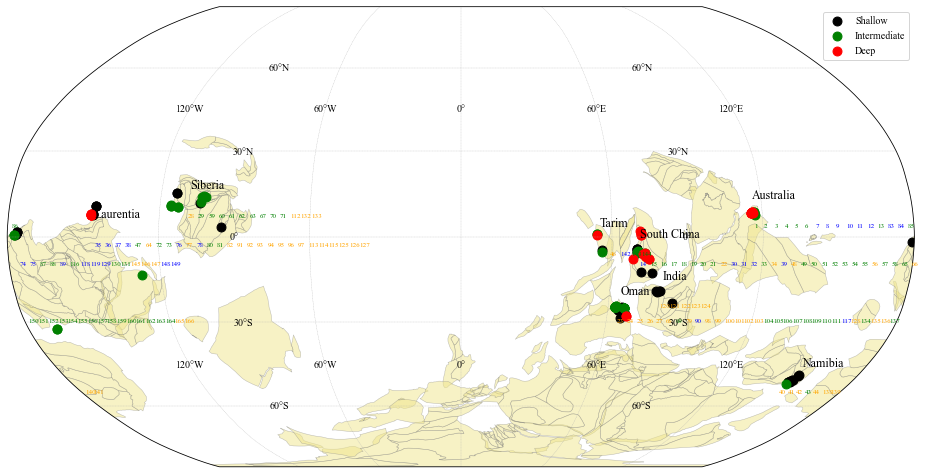

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import numpy as np
%matplotlib inline

coastlines_filename = 'PALEOMAP_DATA/shapes_static_polygons_Merdith_et_al.gpml'
pygplates.reconstruct(coastlines_filename,
                      rotation_model,
                      '/tmp/reconstructed_coastlines.shp',
                     570) 

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Times New Roman'

# Create map
fig = plt.figure(figsize=(14,10))
ax_map = fig.add_axes([0,0,0.9,1.0], projection=ccrs.Robinson(central_longitude=0))

# Plot the reconstructed coastlines
shp_info = shpreader.Reader('/tmp/reconstructed_coastlines.shp').geometries()
ft_coastline  = cfeature.ShapelyFeature(shp_info, ccrs.PlateCarree())
ax_map.add_feature(ft_coastline, facecolor='khaki', edgecolor='0.5', linewidth=0.5, alpha=0.5)



ax_map.scatter(list(df[df['Facies'] == 'Shallow']['Paleo_longitude']),list(df[df['Facies'] == 'Shallow']['Paleo_latitude']), transform=ccrs.PlateCarree(), 
                marker='o', color = 'black', s=80, label = 'Shallow')


    
ax_map.scatter(list(df[df['Facies'] == 'Intermediate']['Paleo_longitude']),list(df[df['Facies'] == 'Intermediate']['Paleo_latitude']), transform=ccrs.PlateCarree(), 
                marker='o', color = 'green', s=80, label = 'Intermediate')


ax_map.scatter(list(df[df['Facies'] == 'Deep']['Paleo_longitude']),list(df[df['Facies'] == 'Deep']['Paleo_latitude']), transform=ccrs.PlateCarree(), 
                marker='o', color = 'red', s=80, label = 'Deep')

data = df.groupby('Continent')

for x,y,z in zip(data['Paleo_longitude'].mean().index, data['Paleo_longitude'].mean(),data['Paleo_latitude'].mean()):
    ax_map.text(y, z+5, x, transform=ccrs.PlateCarree(), fontsize = 12,color = 'k')
    length_of_entries = len(str(df[df['Continent'] == x]['Entry'].values))
    #打印字符的位置差值
    entries_list = np.linspace(0, length_of_entries, length_of_entries)
    factor = 4
    for x1,y1,z1 in zip(entries_list, df[df['Continent'] == x]['Entry'].values, df[df['Continent'] == x]['Facies'].values):
        if z1 == 'Shallow':
            ax_map.text(y+x1*factor, z-5, y1, transform=ccrs.PlateCarree(), fontsize = 7,color = 'orange')
        elif z1 == 'Intermediate':
            ax_map.text(y+x1*factor, z-5, y1, transform=ccrs.PlateCarree(), fontsize = 7,color = 'green')
        else:
            ax_map.text(y+x1*factor, z-5, y1, transform=ccrs.PlateCarree(), fontsize = 7,color = 'blue')

ax_map.gridlines(linestyle = '--',linewidth = 0.3,draw_labels=True, dms=True, x_inline=True, y_inline=True)

# Show global extent and plot
ax_map.set_global()
ax_map.legend()
plt.savefig('Figures/570_map.pdf', format = 'pdf')

## PLOT the section positions on the modern map

/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:5: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecate

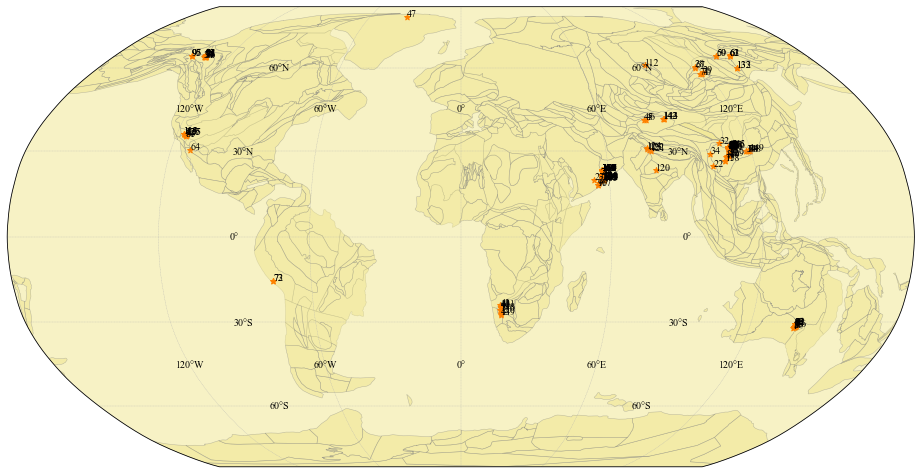

In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import numpy as np
%matplotlib inline

df = pd.read_excel('./Database/DOUNCE_preliminary_summary.xlsx')

coastlines_filename = 'PALEOMAP_DATA/shapes_continents_Merdith_et_al.gpml'
pygplates.reconstruct(coastlines_filename,
                      rotation_model,
                      '/tmp/reconstructed_modern_coastlines.shp',0) 

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Times New Roman'

# Create map
fig = plt.figure(figsize=(14,10))
ax_map = fig.add_axes([0,0,0.9,1.0], projection=ccrs.Robinson(central_longitude=0))

# Plot the reconstructed coastlines
shp_info = shpreader.Reader('/tmp/reconstructed_modern_coastlines.shp').geometries()
ft_coastline  = cfeature.ShapelyFeature(shp_info, ccrs.PlateCarree())
ax_map.add_feature(ft_coastline, facecolor='khaki', edgecolor='0.5', linewidth=0.5, alpha=0.5)

ax_map.scatter(list(df['Present_longitude']),list(df['Present_latitude']), transform=ccrs.PlateCarree(), 
                marker='*', color = '#FF8100')
for x in df['Present_longitude'].index:
    ax_map.text(df['Present_longitude'][x], df['Present_latitude'][x], df['Entry'][x], transform=ccrs.PlateCarree(),color = 'k')
  

# Show global extent and plot
ax_map.set_global()
ax_map.gridlines(linestyle = '--',linewidth = 0.3,draw_labels=True, dms=True, x_inline=True, y_inline=True)

plt.savefig('Figures/Modern_map.pdf')

# Create a complete summary file for the ESR 2024 paper

In [86]:
'''
TO create the sumamry table of d13C values, stratigraphic thickness, and metadata for each entry
'''
import pandas as pd
from collections import Counter
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Alignment, Border, Side
from openpyxl.utils import get_column_letter
from openpyxl.chart import ScatterChart, Reference, Series, LineChart

from openpyxl import Workbook

entry_data_summary = pd.read_excel('./Database/DOUNCE_preliminary_summary.xlsx')

# print(entry_data_summary)
entry_list = entry_data_summary['Entry']

columns = [
    'Reference', 'Pre_med', 'Falling_min', 'Plat_rising_min', 'Platform_med',
    'Rising_max', 'Post_med', 'Lowest_C', 'Magnitude', 'Mag_cal_method',
    'ST_Pre', 'ST_Falling', 'ST_Plat_rising', 'ST_Platform', 'ST_Rising',
    'ST_Post', 'ST', 'Water_depth', 'Lithology',
    'Pre_lithology','Fall_lithology','Plat_rising_lithology', 
    'Platform_lithology','Rising_lithology', 'Post_lithology',
    'Lithology_of_lowest', 'Pcont', 'PaleoLati'
]

DOUNCE_zone_labels = [
    'Pre', 'Falling', 'Plat_rising', 'Platform', 'Rising', 'Post'
]

index = entry_list
DOUNCE_summary = pd.DataFrame(columns=columns, index=index)

for entry in entry_list:

    print(entry)
    entry_xls_file = './Database/C_isotopes/' + str(entry) + '.xlsx'
    file_data = pd.read_excel(entry_xls_file)

    # 'Reference, 出现最多的水深标签
    Refe = Counter(
        list(file_data[file_data['DOUNCE zone'] != 'Omit']['Reference']))
    DOUNCE_summary.loc[entry, 'Reference'] = str(list(Refe.keys())[0])

    for label in DOUNCE_zone_labels:
        if np.any(file_data['DOUNCE zone'].str.contains(label)):

            vars()[label] = file_data.loc[
                file_data['DOUNCE zone'].str.contains(label)]

            vars()[label + '_dropna_d13C'] = vars()[label].dropna(subset=['d13C'])

            # stratigraphic thickness
            max_height = np.max(vars()[label]['Meters_above_bottom'])
            min_height = np.min(vars()[label]['Meters_above_bottom'])
            DOUNCE_summary.loc[entry, 'ST_' + str(label)] = float(max_height -
                                                                  min_height)

            # C isotopes
            if label in ['Pre', 'Platform', 'Post']:

                median_C = np.median(vars()[label + '_dropna_d13C']['d13C'])
                DOUNCE_summary.loc[entry,
                                   str(label) + '_med'] = float(median_C)
                
                # Pre Lithology, 出现最多的岩性标签
                if 'Pre' in label:
                    Lith_pre = Counter(
                        list(vars()['Pre']['Lithology']))
                    DOUNCE_summary.loc[entry, 'Pre_lithology'] = str(list(Lith_pre.keys())[0])
                    
                # Post Lithology, 出现最多的岩性签
                if 'Post' in label:
                    Lith_post = Counter(
                        list(vars()['Post']['Lithology']))
                    DOUNCE_summary.loc[entry, 'Post_lithology'] = str(
                        list(Lith_post.keys())[0])
                    
                # Plat Lithology, 出现最多的岩性签
                if 'Platform' in label:
                    Lith_post = Counter(
                        list(vars()['Platform']['Lithology']))
                    DOUNCE_summary.loc[entry, 'Platform_lithology'] = str(
                        list(Lith_post.keys())[0])
    
                    

            elif label in ['Falling', 'Plat_rising']:
                mininum_C = np.min(vars()[label + '_dropna_d13C']['d13C'])
                DOUNCE_summary.loc[entry,
                                   str(label) + '_min'] = float(mininum_C)

                # Fall Lithology, 出现最多的岩性签
                if label == 'Falling':
                    Lith_fall = Counter(
                        list(vars()['Falling']['Lithology']))
                    DOUNCE_summary.loc[entry, 'Fall_lithology'] = str(
                        list(Lith_fall.keys())[0])
                
                # Plat rising Lithology, 出现最多的岩性签
                if 'Plat_rising' in label:
                    Lith_plat_rising = Counter(
                        list(vars()['Plat_rising']['Lithology']))
                    DOUNCE_summary.loc[entry, 'Plat_rising_lithology'] = str(
                        list(Lith_plat_rising.keys())[0])


            elif label == 'Rising':
                maximum_C = np.max(vars()[label + '_dropna_d13C']['d13C'])
                DOUNCE_summary.loc[entry,
                                   str(label) + '_max'] = float(maximum_C)

                # Rising Lithology, 出现最多的岩性签
                if 'Rising' in label:
                    Lith_Rising = Counter(
                        list(vars()['Rising']['Lithology']))
                    DOUNCE_summary.loc[entry, 'Rising_lithology'] = str(
                        list(Lith_Rising.keys())[0])

            else:
                print('Some zones out of known appear')
    '''
    'Lithology_of_lowest, and  'Lowest_C'
    'Falling/Plat_rising', 'Falling/Plat'', without considering the lowest between Falling and Rising
    '''
    if np.any(file_data.loc[file_data['DOUNCE zone'].str.contains('Falling/P')]
              ['d13C']):
        indx = file_data.loc[file_data['DOUNCE zone'].str.contains(
            'Falling/P')]['d13C'].idxmin()
        lowest_d13C = file_data['d13C'][indx]
        lowest_lith = file_data['Lithology'][indx]
        DOUNCE_summary.loc[entry, 'Lithology_of_lowest'] = str(lowest_lith)

        DOUNCE_summary.loc[entry, 'Lowest_C'] = float(lowest_d13C)

    # Total thickness
    ST = np.max(file_data[file_data['DOUNCE zone'] != 'Omit']['Meters_above_bottom']) - \
        np.min(file_data[file_data['DOUNCE zone'] != 'Omit']['Meters_above_bottom'])
    DOUNCE_summary.loc[entry, 'ST'] = float(ST)
    ''' ['Water_depth', 'Lithology' ,'Pcont', 'PaleoLati'] '''

    # Water_depth, 出现最多的水深标签
    WP = Counter(list(file_data[file_data['DOUNCE zone'] != 'Omit']['Facies']))
    DOUNCE_summary.loc[entry, 'Water_depth'] = str(list(WP.keys())[0])

    # Lithology, 出现最多的岩性标签
    Lith = Counter(
        list(file_data[file_data['DOUNCE zone'] != 'Omit']['Lithology']))
    DOUNCE_summary.loc[entry, 'Lithology'] = str(list(Lith.keys())[0])

    # 'Pcont, 出现最多的水深标签
    Conti = Counter(
        list(file_data[file_data['DOUNCE zone'] != 'Omit']['Continent']))
    DOUNCE_summary.loc[entry, 'Pcont'] = str(list(Conti.keys())[0])

    # 'PaleoLati
    lati = entry_data_summary['Paleo_latitude'][entry - 1]
    if lati > 0:
        DOUNCE_summary.loc[entry, 'PaleoLati'] = '30-0°N'
    elif lati <= -30:
        DOUNCE_summary.loc[entry, 'PaleoLati'] = '60-30°S'
    else:
        DOUNCE_summary.loc[entry, 'PaleoLati'] = '30-0°S'
    '''
    C isotope magnitude and magnitude type
    'Magnitude', 'Mag_cal_method'
    'Fall min', 'Plat Rise min', 'Plat med', 'Rise max', 'Post med', 
    DOUNCE_zone_labels = ['Pre', 'Falling', 'Plat_rising', 'Platform', 'Rising', 'Post']
    '''
    if not np.isnan(DOUNCE_summary['Pre_med'][entry]):
        if np.any(DOUNCE_summary.loc[
                entry, ['Falling_min', 'Plat_rising_min', 'Platform_med']]):
            DOUNCE_summary.loc[entry, 'Mag_cal_method'] = 'Pre-LOWEST'
            lowest = np.min(DOUNCE_summary.loc[
                entry, ['Falling_min', 'Plat_rising_min', 'Platform_med']])
             # 可靠的幅度有上升段或者Plat rise、plat，计算为正常计算，表达为正值
            if np.any(DOUNCE_summary.loc[
                    entry, ['Plat_rising_min', 'Platform_med', 'Rising_max']]):
                DOUNCE_summary.loc[entry, 'Magnitude'] = round(
                    DOUNCE_summary['Pre_med'][entry] - lowest, 2)

#     elif not np.isnan(DOUNCE_summary['Post med'][entry]):
#         if np.any(DOUNCE_summary.loc[
#                 entry, ['Falling min', 'Plat_rising min', 'Platform med']]):
#             DOUNCE_summary.loc[entry, 'Mag_cal_method'] = 'Post-LOWEST'
#             lowest = np.min(DOUNCE_summary.loc[
#                 entry, ['Falling min', 'Plat_rising min', 'Platform med']])
#             if np.any(DOUNCE_summary.loc[
#                     entry, ['Plat_rising min', 'Platform med', 'Rising max']]):
#                 DOUNCE_summary.loc[entry, 'Magnitude'] = round(
#                     DOUNCE_summary['Post med'][entry] - lowest, 2)
#             else:
#                 DOUNCE_summary.loc[entry, 'Magnitude'] = round(
#                     lowest - DOUNCE_summary['Post med'][entry], 2)
    else:
        pass


### If no relaible Pre and Platform or Plat_rising stage, the ST_falling is set as nan
for row in DOUNCE_summary.index:
    if np.isnan(DOUNCE_summary['ST_Pre'][row]):
        DOUNCE_summary['ST_Falling'][row] = np.nan
    elif np.isnan(DOUNCE_summary['ST_Plat_rising'][row]) and np.isnan(DOUNCE_summary['ST_Platform'][row]):
        DOUNCE_summary['ST_Falling'][row] = np.nan
    else:
        pass

# Similar things to the ST_rising
for row in DOUNCE_summary.index:
    if np.isnan(DOUNCE_summary['ST_Post'][row]):
        DOUNCE_summary['ST_Rising'][row] = np.nan
    elif np.isnan(DOUNCE_summary['ST_Platform'][row]):
        DOUNCE_summary['ST_Rising'][row] = np.nan
    else:
        pass
    
        

############################## DECORATE THE OUTPUT SUMMARY EXCEL DOCUMENT####################################
wb = Workbook()  # 实例化一个工作簿对象
ws = wb.active

ws.append(list(DOUNCE_summary.columns))
for row in DOUNCE_summary.values:
    # 添加这一行到列表中
    ws.append(list(row))

# 最大行数和最大列数
max_rows = ws.max_row
max_columns = ws.max_column

for j in range(1, max_columns + 1):
    # 列名称 比如 A B C D等
    column_letter = get_column_letter(j)
    # default column width = 8,列宽自由变化
    d_c_w = 8
    for cell_value in ws[column_letter]:
        if len(str(cell_value.value)) >= d_c_w:
            d_c_w = len(str(cell_value.value))
    ws.column_dimensions[column_letter].width = d_c_w

    # 居中方式和字体，首行加粗 有边框
    for i in range(1, max_rows + 1):
        if i == 1:
            ws.cell(i, j).alignment = Alignment(horizontal='center',
                                                vertical='center')
            ws.cell(i, j).font = Font(name='Times New Roman',
                                      bold=True,
                                      size=11)
            ws.cell(i, j).border = Border(bottom=Side(style='thin'),
                                          right=Side(style='thin'))
        else:
            ws.cell(i, j).alignment = Alignment(horizontal='center',
                                                vertical='center')
            ws.cell(i, j).font = Font(name='Times New Roman', size=11)
            # 倒数10列的数字格式 保留3位
            if j >= 2:
                ws.cell(i, j).number_format = '0.000'

wb.save('./Database/DOUNCE_advanced_summary.xlsx')
wb.close()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166


# Plot figures script - 1

## Divide the sections into four catagory by using total section thickness

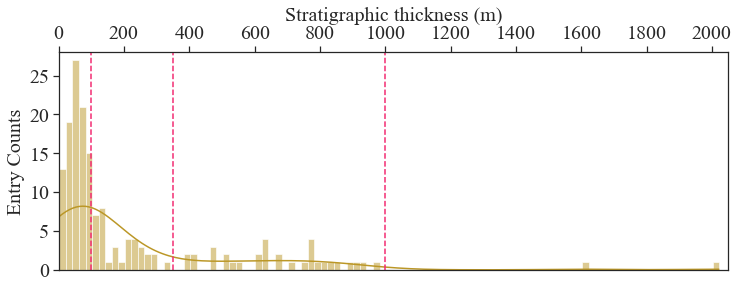

In [87]:
import seaborn as sns
import numpy as np
figure = plt.figure(figsize = (12, 4))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Times New Roman'

LIST = pd.read_excel('./Database/DOUNCE_advanced_summary.xlsx')
sns.histplot(data = LIST['ST'],binwidth = 20, color = '#BB9727', kde = True)


plt.axvline(x = 100, color = '#F22970', linestyle = '--')

plt.axvline(x = 350, color = '#F22970', linestyle = '--')

plt.axvline(x = 1000, color = '#F22970', linestyle = '--')
ax = plt.gca()

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], fontsize = 20)
plt.xticks
plt.xlabel(xlabel = 'Stratigraphic thickness (m)', fontsize = 20)

plt.xlim(0,2050)

plt.yticks([0, 5, 10, 15, 20, 25], fontsize = 20)
plt.ylabel(ylabel = 'Entry Counts', fontsize = 20)
plt.ylim(0, 28)


plt.savefig('Figures/section_type.pdf')



[0, 9.0, 39.85, 82.208, 117.528, 158.528, 175.528]


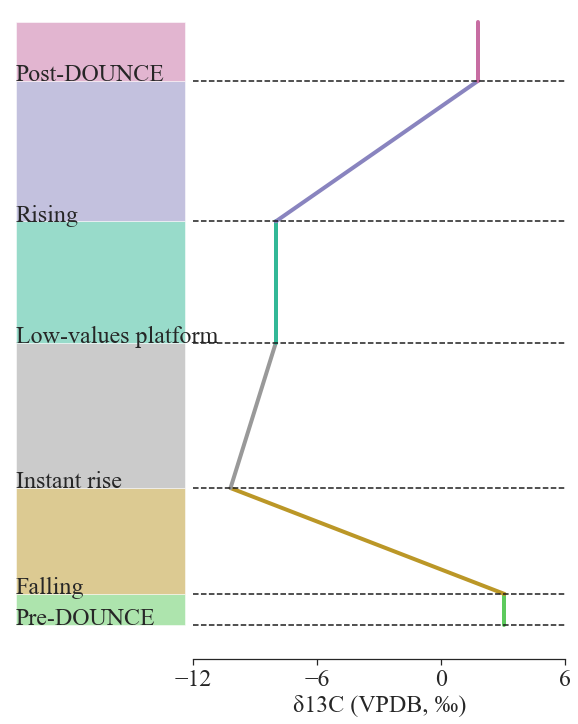

In [88]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_excel('./Database/DOUNCE_advanced_summary.xlsx')

ST_list = [
    'ST_Pre', 'ST_Falling', 'ST_Plat_rising', 'ST_Platform', 'ST_Rising',
    'ST_Post'
]
DOUNCE_zones = ['Pre_med', 'Lowest_C', 'Platform_med', 'Post_med']

ST_median = [0]
for period in ST_list:
    ST_period = data[period].dropna().values
    thickness = np.median(ST_period)
    height = thickness + ST_median[-1]

    ST_median.append(round(height, 3))

C_median = []
for zone in DOUNCE_zones:
    C_period = data[zone].dropna().values
    if zone != 'Lowest_C':
        C_median.append(round(np.median(C_period), 3))
        C_median.append(round(np.median(C_period), 3))
    else:
        C_median.append(round(np.median(C_period), 3))

### stage range colors
stage_colors = [
    '#5DCA5D', '#BB9727', '#999999', '#32B897', '#8984BF', '#C76DA2'
]
stage_name = [
    'Pre-DOUNCE', "Falling", "Instant rise", 'Low-values platform', 'Rising',
    'Post-DOUNCE'
]

figure = plt.figure(figsize=(10, 12))

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Times New Roman'

grid = plt.GridSpec(nrows=1, ncols=3, wspace=0, hspace=0)

fig1 = plt.subplot(grid[0, 1:3])

for stage in stage_name:
    stage_id = stage_name.index(stage)

    plt.plot(C_median[stage_id:stage_id + 2],
             ST_median[stage_id:stage_id + 2],
             color=stage_colors[stage_id],
             linestyle='-',
             linewidth=4)

    plt.axhline(ST_median[stage_id],linestyle = '--', color = 'k')
    
plt.xlim(-12, 6)
plt.xticks([-12, -6, 0, 6], fontsize=24)
plt.yticks([])
plt.xlabel('δ13C (VPDB, ‰)', fontsize=24)

fig1.spines['right'].set_visible(False)
fig1.spines['top'].set_visible(False)
fig1.spines['left'].set_visible(False)

plt.ylim(-10, 180)

fig2 = plt.subplot(grid[0, :1], sharey=fig1)
width = [0, 1]
ax2 = plt.gca()

print(ST_median)

for stage_id in range(len(stage_name)):
    
    ax2.fill_between(width,
                     ST_median[stage_id],
                     ST_median[stage_id+1],
                     facecolor=stage_colors[stage_id],
                     alpha=0.5)
    ax2.text(0, ST_median[stage_id], stage_name[stage_id], fontsize=24)


ax2.axis('off')

figure.savefig('./Database/C_isotopes_figures/DOUNCE_zones.pdf',
               format='pdf',
               bbox_inches='tight')

Create short sections, intermediate sections, long sections, super long sections

In [89]:
LIST = pd.read_excel('./Database/DOUNCE_preliminary_summary.xlsx')
Short_sec = LIST[LIST['Sec/Bor Heights'] < 100]
sec_1 = LIST[LIST['Sec/Bor Heights'] >= 100]
Intermediate_sec = sec_1[sec_1['Sec/Bor Heights'] < 350]
sec_2 = LIST[LIST['Sec/Bor Heights'] >= 350]
Long_sec = sec_2[sec_2['Sec/Bor Heights'] < 1000]
Super_long_sec = LIST[LIST['Sec/Bor Heights'] >= 1000]

import math
print(math.ceil(len(Super_long_sec['Entry'])/13)) 
np.arange(1, len(Super_long_sec['Entry']) + 1,1)

1


array([1, 2])

## C isotope profiles of short sections

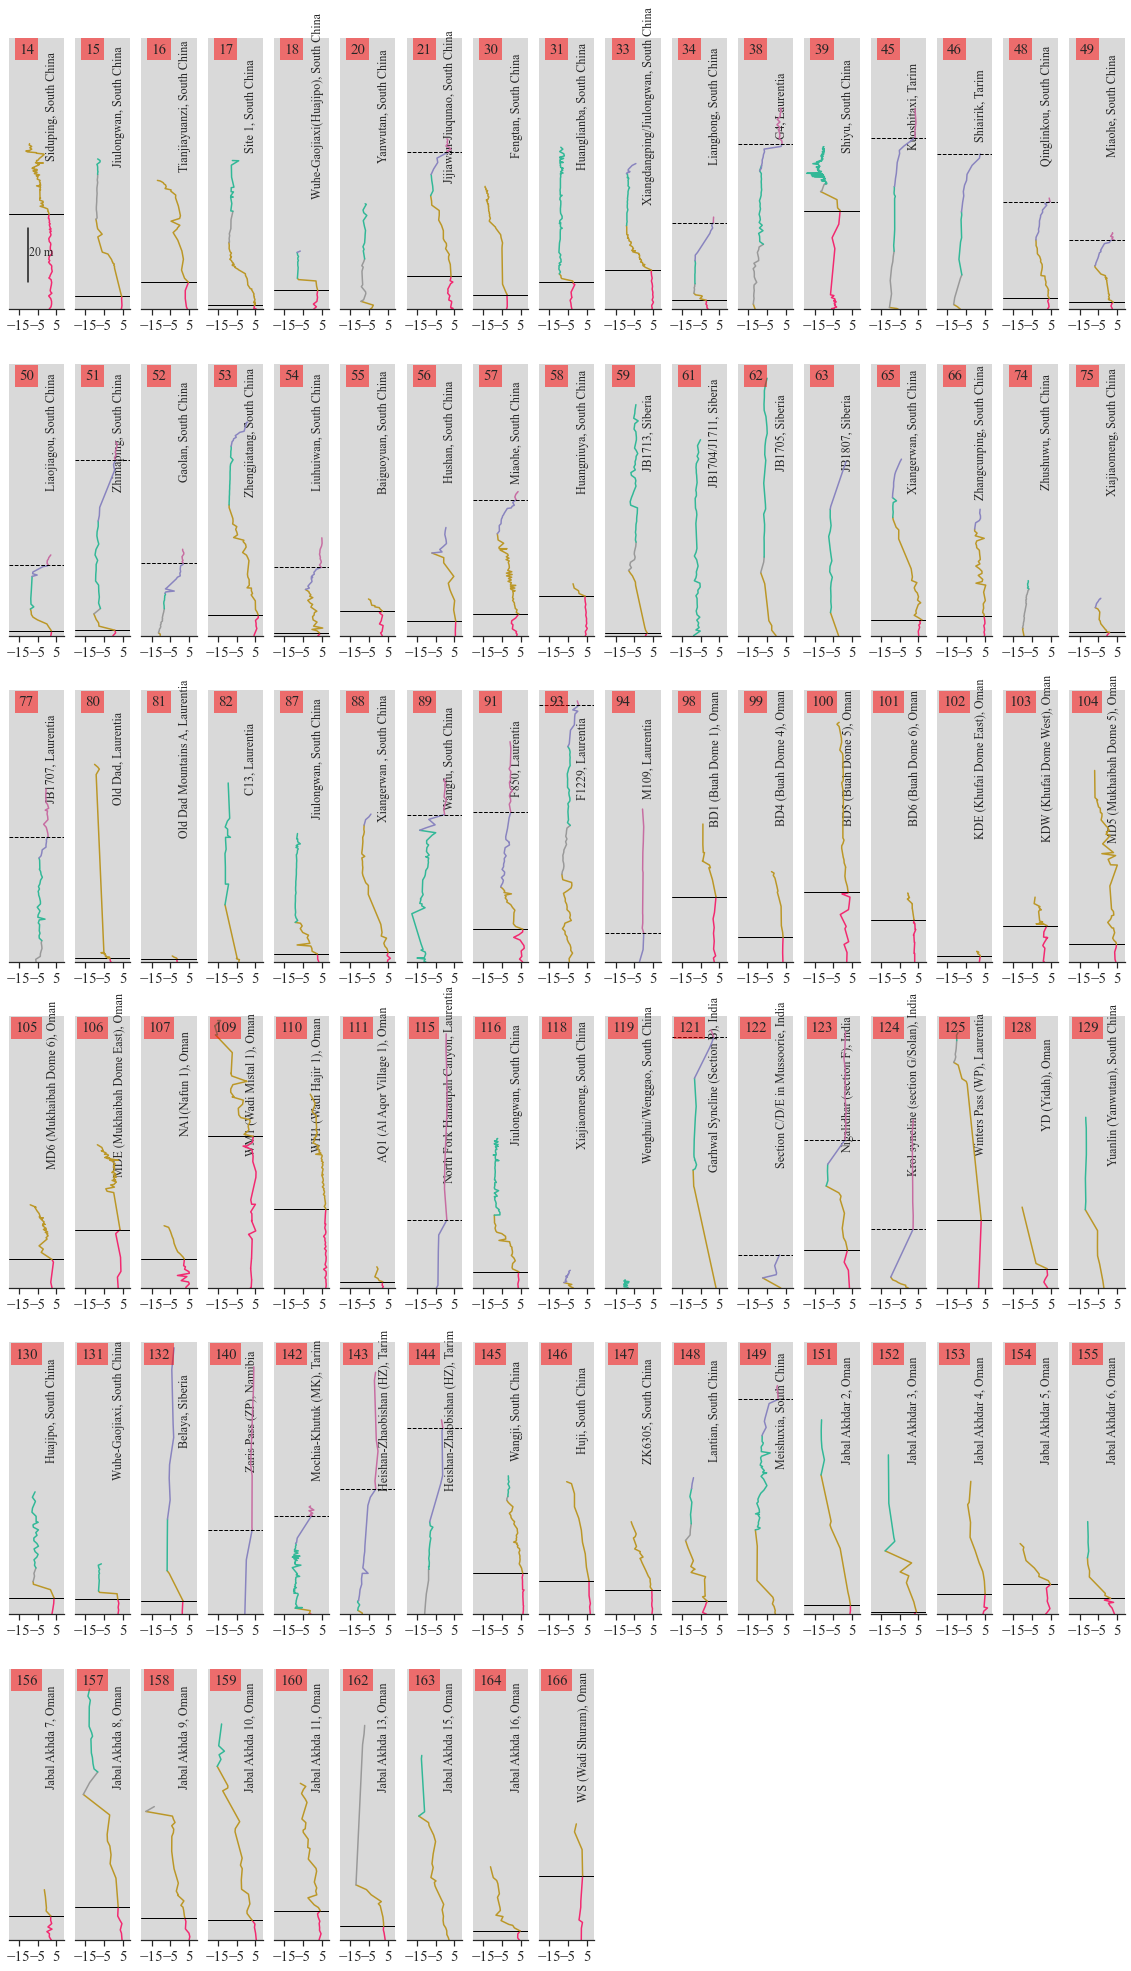

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math

figure = plt.figure(figsize=(20, 35))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Times New Roman'

DOUNCE_zone_labels = [
    'Pre', 'Falling', 'Plat_rising', 'Platform', 'Rising', 'Post'
]
colors = ['#F22970', '#BB9727', '#999999', '#32B897', '#8984BF', '#C76DA2']

for entry, plot_id in zip(Short_sec['Entry'],
                          np.arange(1,
                                    len(Short_sec['Entry']) + 1, 1)):
    # print(entry)
    # file name in the LIST
    file = './Database/C_isotopes/' + str(entry) + '.xlsx'
    file_data = pd.read_excel(file)
    section_name = file_data['Section'][0]
    borehole_name = file_data['Borehole'][0]
    continent_name = file_data['Continent'][0]
    figs_number = len(Short_sec['Entry'])
    if plot_id == 1:
        fig1 = plt.subplot(6, 17, plot_id)
    else:
        fig = plt.subplot(6, 17, plot_id, sharey=fig1, sharex=fig1)

    offset_meters = list(file_data[file_data['DOUNCE zone'] != 'Omit']
                         ['Meters_above_bottom'])[0]
    file_data['Meters_above_bottom'] = file_data[
        'Meters_above_bottom'] - offset_meters

    for label, color in zip(DOUNCE_zone_labels, colors):
        if np.any(file_data['DOUNCE zone'].str.contains(label)):

            vars()[label] = file_data.loc[
                file_data['DOUNCE zone'].str.contains(label)]

            vars()[label] = vars()[label].dropna(subset=['d13C'])

            plt.plot(vars()[label]['d13C'],
                     vars()[label]['Meters_above_bottom'],
                     color=color)

            # print(file_data[file_data['DOUNCE zone'] != 'Omit']['DOUNCE zone'])
            if np.any(vars()[label]):
                if label == 'Pre':
                    plt.axhline(y=max(
                        list(vars()[label]['Meters_above_bottom'])),
                                color='black', linewidth = 1)
                elif label == 'Post':
                    plt.axhline(y=min(
                        list(vars()[label]['Meters_above_bottom'])),
                                color='black',
                                linestyle='--', linewidth = 1)

                else:
                    pass

    plt.title(str(entry),
              x=0.32,
              y=0.92,
              fontsize=15,
              bbox=dict(facecolor='red', alpha=0.5, linestyle='None'))
    plt.yticks([])
    plt.xticks(fontsize = 15)

    if not pd.isna(section_name):
        plt.ylabel(str(section_name) + ', ' + str(continent_name), fontsize=12)
    else:
        plt.ylabel(str(borehole_name) + ', ' + str(continent_name),
                   fontsize=12)

    plt.gca().yaxis.set_label_coords(0.9, 0.75)

    if plot_id == 1:
        fig1.set_facecolor('#D9D9D9')
        fig1.spines['right'].set_visible(False)
        fig1.spines['top'].set_visible(False)
        fig1.spines['left'].set_visible(False)

        plt.ylim(0, 100)

        # legend bar, 20m
        plt.axvline(x=-10, ymin=0.1, ymax=0.3, color='k')
        plt.text(x=-9.5, y=20, s='20 m', fontsize=12)
        plt.xticks([-15, -5, 5])
    

    else:
        fig.set_facecolor('#D9D9D9')
        fig.spines['right'].set_visible(False)
        fig.spines['top'].set_visible(False)
        fig.spines['left'].set_visible(False)

#         fig.axvspan(xmin = -10, xmax = 5, ymin = 0, ymax = 0.8, color = 'r', alpha = 0.1)

plt.savefig('./Database/C_isotopes_figures/short_sections.pdf')

## C isotope profiles of intermediate sections

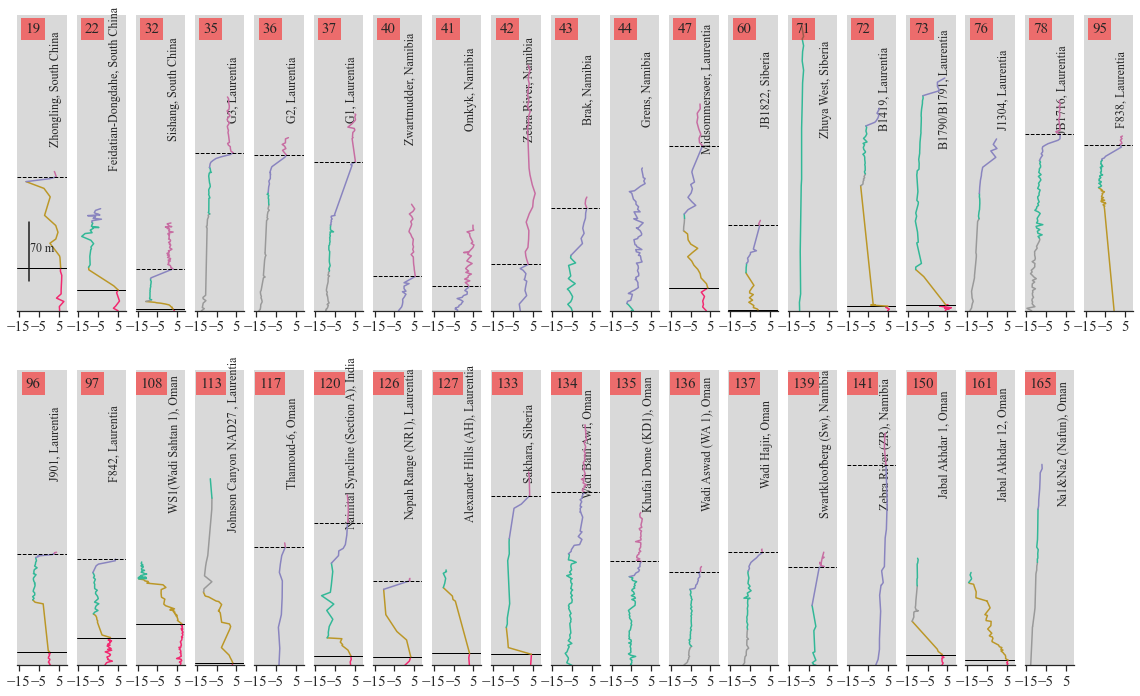

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math

figure = plt.figure(figsize=(20, 25))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Times New Roman'

DOUNCE_zone_labels = [
    'Pre', 'Falling', 'Plat_rising', 'Platform', 'Rising', 'Post'
]
colors = ['#F22970', '#BB9727', '#999999', '#32B897', '#8984BF', '#C76DA2']

for entry, plot_id in zip(Intermediate_sec['Entry'],
                          np.arange(1,
                                    len(Intermediate_sec['Entry']) + 1, 1)):
    #print(entry)
    # file name in the LIST
    file = './Database/C_isotopes/' + str(entry) + '.xlsx'
    file_data = pd.read_excel(file)
    section_name = file_data['Section'][0]
    borehole_name = file_data['Borehole'][0]
    continent_name = file_data['Continent'][0]
    figs_number = len(Short_sec['Entry'])
    if plot_id == 1:
        fig1 = plt.subplot(4, 19, plot_id)
    else:
        fig = plt.subplot(4, 19, plot_id, sharey=fig1, sharex=fig1)

    offset_meters = list(file_data[file_data['DOUNCE zone'] != 'Omit']
                         ['Meters_above_bottom'])[0]
    file_data['Meters_above_bottom'] = file_data[
        'Meters_above_bottom'] - offset_meters

    for label, color in zip(DOUNCE_zone_labels, colors):
        if np.any(file_data['DOUNCE zone'].str.contains(label)):

            vars()[label] = file_data.loc[
                file_data['DOUNCE zone'].str.contains(label)]

            vars()[label] = vars()[label].dropna(subset=['d13C'])

            plt.plot(vars()[label]['d13C'],
                     vars()[label]['Meters_above_bottom'],
                     color=color)

            #print(file_data[file_data['DOUNCE zone'] != 'Omit']['DOUNCE zone'])
            if np.any(vars()[label]):
                if label == 'Pre':
                    plt.axhline(y=max(
                        list(vars()[label]['Meters_above_bottom'])),
                                color='black', linewidth = 1)
                elif label == 'Post':
                    plt.axhline(y=min(
                        list(vars()[label]['Meters_above_bottom'])),
                                color='black',
                                linestyle='--', linewidth = 1)

                else:
                    pass

    plt.title(str(entry),
              x=0.32,
              y=0.92,
              fontsize=15,
              bbox=dict(facecolor='red', alpha=0.5, linestyle='None'))
    plt.yticks([])
    plt.xticks(fontsize=15)
    if not pd.isna(section_name):
        plt.ylabel(str(section_name) + ', ' + str(continent_name), fontsize=12)
    else:
        plt.ylabel(str(borehole_name) + ', ' + str(continent_name),
                   fontsize=12)
    plt.gca().yaxis.set_label_coords(0.9, 0.75)

    if plot_id == 1:
        fig1.set_facecolor('#D9D9D9')
        fig1.spines['right'].set_visible(False)
        fig1.spines['top'].set_visible(False)
        fig1.spines['left'].set_visible(False)

        plt.ylim(0, 350)
        #legend bar, 20m
        plt.axvline(x=-10, ymin=0.1, ymax=0.3, color='k')
        plt.text(x=-9.5, y=70, s='70 m', fontsize=12)
        plt.xticks([-15, -5, 5])

    else:
        fig.set_facecolor('#D9D9D9')
        fig.spines['right'].set_visible(False)
        fig.spines['top'].set_visible(False)
        fig.spines['left'].set_visible(False)

plt.savefig('./Database/C_isotopes_figures/Intermediate_sections.pdf')

## C isotope profiles of long sections

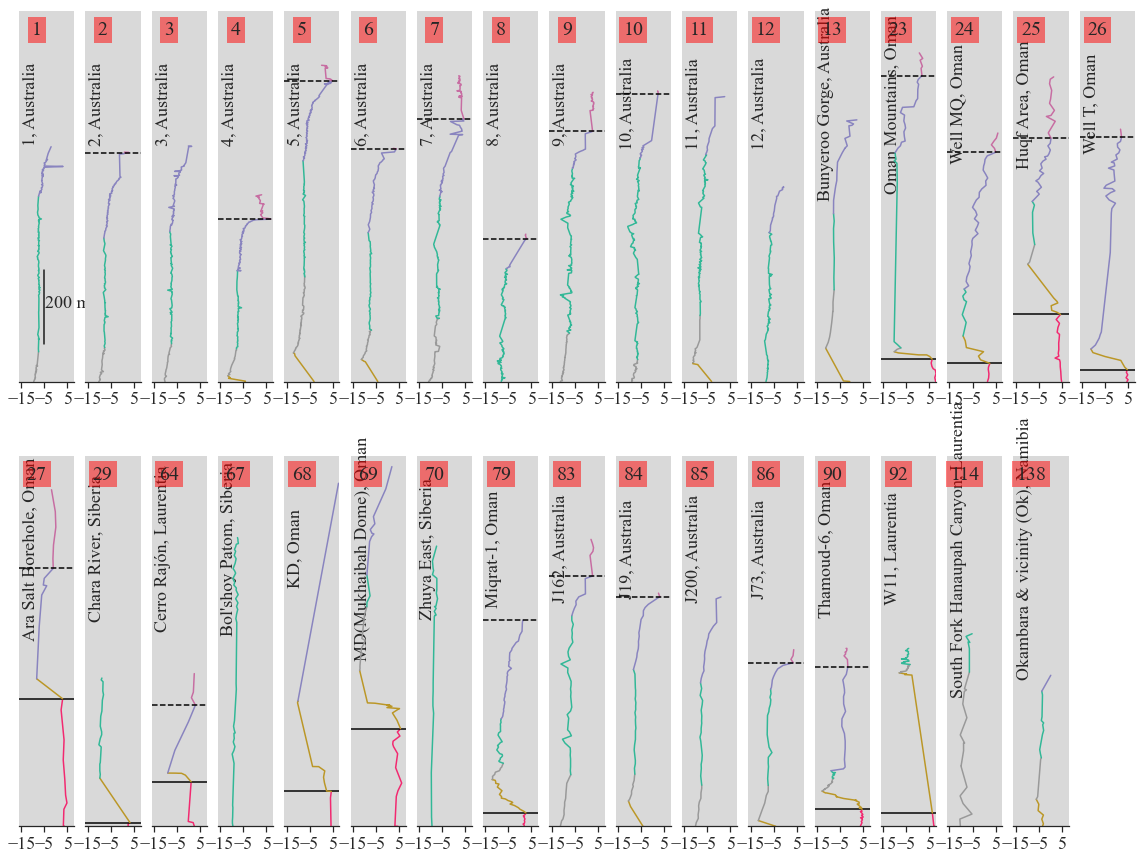

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math

figure = plt.figure(figsize = (20, 15))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Times New Roman'

DOUNCE_zone_labels = ['Pre', 'Falling', 'Plat_rising', 'Platform', 'Rising', 'Post']
colors = ['#F22970', '#BB9727', '#999999', '#32B897', '#8984BF','#C76DA2']


for entry, plot_id in zip(Long_sec['Entry'],np.arange(1, len(Long_sec['Entry']) + 1,1)):
    #print(entry)
    # file name in the LIST
    file = './Database/C_isotopes/' + str(entry) + '.xlsx'
    file_data = pd.read_excel(file)
    section_name = file_data['Section'][0]
    borehole_name = file_data['Borehole'][0]
    continent_name = file_data['Continent'][0]
    figs_number = len(Short_sec['Entry'])
    if plot_id == 1:
        fig1 = plt.subplot(2, 17, plot_id)
    else:
        fig = plt.subplot(2, 17, plot_id, sharey = fig1, sharex = fig1)
    
    offset_meters = list(file_data[file_data['DOUNCE zone'] != 'Omit']['Meters_above_bottom'])[0]
    file_data['Meters_above_bottom'] = file_data['Meters_above_bottom'] - offset_meters
    
    for label, color in zip(DOUNCE_zone_labels, colors):
        if np.any(file_data['DOUNCE zone'].str.contains(label)):

            vars()[label] = file_data.loc[file_data['DOUNCE zone'].str.contains(label)]
            
            vars()[label] = vars()[label].dropna(subset = ['d13C'])
            
            plt.plot(vars()[label]['d13C'], vars()[label]['Meters_above_bottom'], color = color)
        
            #print(file_data[file_data['DOUNCE zone'] != 'Omit']['DOUNCE zone'])
            if np.any(vars()[label]):
                if label == 'Pre':
                    plt.axhline(y = max(list(vars()[label]['Meters_above_bottom'])), color = 'black')
                elif label == 'Post':
                    plt.axhline(y = min(list(vars()[label]['Meters_above_bottom'])), color = 'black', linestyle = '--')

                else:
                    pass
            
    plt.title(str(entry), x = 0.32, y = 0.92, fontsize = 20, bbox = dict(facecolor='red', alpha=0.5, linestyle = 'None'))
    plt.yticks([])
    
    plt.xticks(fontsize = 18)
    if not pd.isna(section_name):
        plt.ylabel(str(section_name) + ', ' + str(continent_name), fontsize = 18)
    else:
        plt.ylabel(str(borehole_name) + ', ' + str(continent_name), fontsize = 18)
    plt.gca().yaxis.set_label_coords(0.35,0.75)
    
    if plot_id == 1:
        fig1.set_facecolor('#D9D9D9')
        fig1.spines['right'].set_visible(False)
        fig1.spines['top'].set_visible(False)
        fig1.spines['left'].set_visible(False)
        
        plt.ylim(0,1000)
        #legend bar, 20m
        plt.axvline(x = -5, ymin = 0.1, ymax = 0.3, color = 'k')
        plt.text(x = -4.8, y = 200, s='200 m', fontsize = 18)
        plt.xlim(-16, 8)

        plt.xticks([-15, -5, 5])
        
    else:
        fig.set_facecolor('#D9D9D9')
        fig.spines['right'].set_visible(False)
        fig.spines['top'].set_visible(False)
        fig.spines['left'].set_visible(False)

    
plt.savefig('./Database/C_isotopes_figures/Long_sections.pdf')

## C isotope profiles of super long sections

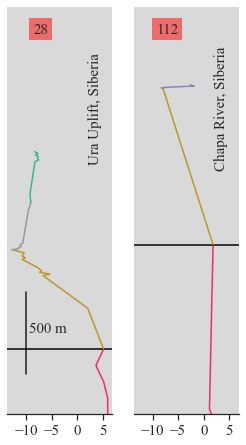

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math

figure = plt.figure(figsize = (20, 7.5))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Times New Roman'

DOUNCE_zone_labels = ['Pre', 'Falling', 'Plat_rising', 'Platform', 'Rising', 'Post']
colors = ['#F22970', '#BB9727', '#999999', '#32B897', '#8984BF','#C76DA2']


for entry, plot_id in zip(Super_long_sec['Entry'],np.arange(1, len(Super_long_sec['Entry']) + 1,1)):
    #print(entry)
    # file name in the LIST
    file = './Database/C_isotopes/' + str(entry) + '.xlsx'
    file_data = pd.read_excel(file)
    section_name = file_data['Section'][0]
    borehole_name = file_data['Borehole'][0]
    continent_name = file_data['Continent'][0]
    figs_number = len(Short_sec['Entry'])
    if plot_id == 1:
        fig1 = plt.subplot(1, 9, plot_id)
    else:
        fig = plt.subplot(1, 9, plot_id, sharey = fig1, sharex = fig1)
    
    offset_meters = list(file_data[file_data['DOUNCE zone'] != 'Omit']['Meters_above_bottom'])[0]
    file_data['Meters_above_bottom'] = file_data['Meters_above_bottom'] - offset_meters
    
    for label, color in zip(DOUNCE_zone_labels, colors):
        if np.any(file_data['DOUNCE zone'].str.contains(label)):

            vars()[label] = file_data.loc[file_data['DOUNCE zone'].str.contains(label)]
            
            vars()[label] = vars()[label].dropna(subset = ['d13C'])
            
            plt.plot(vars()[label]['d13C'], vars()[label]['Meters_above_bottom'], color = color)
        
            #print(file_data[file_data['DOUNCE zone'] != 'Omit']['DOUNCE zone'])
            if np.any(vars()[label]):
                if label == 'Pre':
                    plt.axhline(y = max(list(vars()[label]['Meters_above_bottom'])), color = 'black')
                elif label == 'Post':
                    plt.axhline(y = min(list(vars()[label]['Meters_above_bottom'])), color = 'black', linestyle = '--')

                else:
                    pass
            
    plt.title(str(entry), x = 0.32, y = 0.92, fontsize = 15, bbox = dict(facecolor='red', alpha=0.5, linestyle = 'None'))
    plt.yticks([])
    
    plt.xticks(fontsize = 15)
    
    if not pd.isna(section_name):
        plt.ylabel(str(section_name) + ', ' + str(continent_name), fontsize = 15)
    else:
        plt.ylabel(str(borehole_name) + ', ' + str(continent_name), fontsize = 15)
    plt.gca().yaxis.set_label_coords(0.9,0.75)
    
    if plot_id == 1:
        fig1.set_facecolor('#D9D9D9')
        fig1.spines['right'].set_visible(False)
        fig1.spines['top'].set_visible(False)
        fig1.spines['left'].set_visible(False)
        
        plt.ylim(0,2500)
        #legend bar, 20m
        plt.axvline(x = -10, ymin = 0.1, ymax = 0.3, color = 'k')
        plt.text(x = -9.5, y = 500, s='500 m', fontsize = 15)
    
        plt.xticks([-10, -5, 0, 5])
        
    else:
        fig.set_facecolor('#D9D9D9')
        fig.spines['right'].set_visible(False)
        fig.spines['top'].set_visible(False)
        fig.spines['left'].set_visible(False)

    
plt.savefig('./Database/C_isotopes_figures/Super_long_sections.pdf')

## The distribution of entries over the latitudes

/var/folders/1m/lv9sgyz9189f_lht1j8p578m0000gn/T/ipykernel_4542/2498914006.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  N30_0_list = LIST[LIST['Paleo_latitude'] > 0][LIST['Paleo_latitude'] < 24]
/var/folders/1m/lv9sgyz9189f_lht1j8p578m0000gn/T/ipykernel_4542/2498914006.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  S30_0_list = LIST[LIST['Paleo_latitude'] <= 0][LIST['Paleo_latitude'] > -30]
/var/folders/1m/lv9sgyz9189f_lht1j8p578m0000gn/T/ipykernel_4542/2498914006.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  S60_30_list = LIST[LIST['Paleo_latitude'] <= -30][LIST['Paleo_latitude'] > -60]


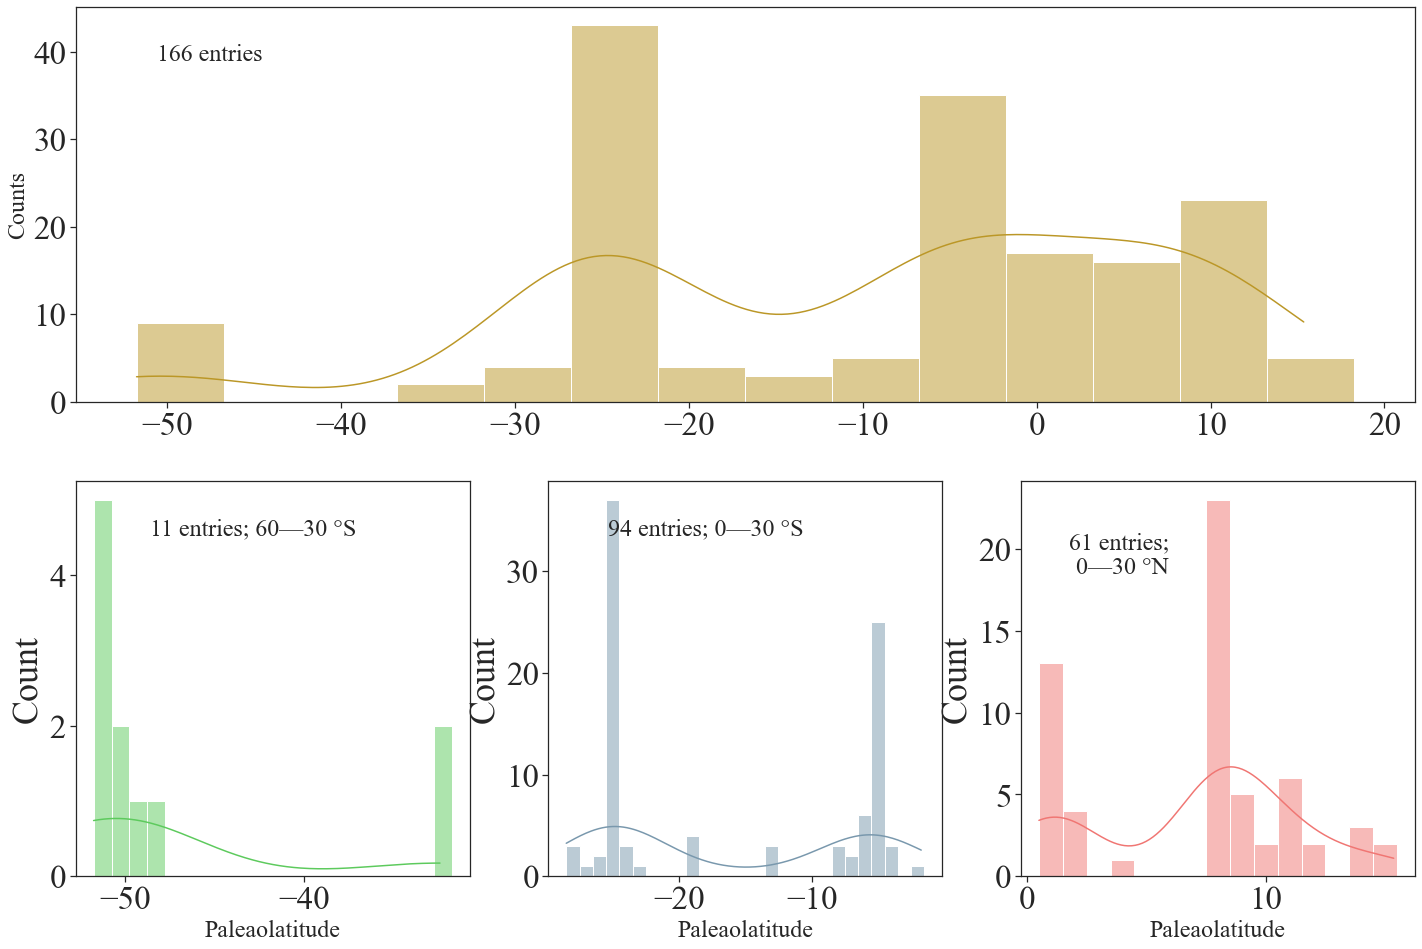

In [94]:
import seaborn as sns
import numpy as np
plt.figure(figsize = (24, 16))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Times New Roman'

plt.subplot(2,1,1)
LIST = pd.read_excel('./Database/DOUNCE_preliminary_summary.xlsx')
sns.histplot(data = LIST['Paleo_latitude'],binwidth = 5, color = '#BB9727', kde = True)
plt.title(str(len(LIST['Paleo_latitude'])) + ' entries', x= 0.1, y = 0.85, fontsize = 24)

plt.ylabel(ylabel = 'Counts', fontsize = 24)
plt.xlabel('')


N30_0_list = LIST[LIST['Paleo_latitude'] > 0][LIST['Paleo_latitude'] < 24]
S30_0_list = LIST[LIST['Paleo_latitude'] <= 0][LIST['Paleo_latitude'] > -30]
S60_30_list = LIST[LIST['Paleo_latitude'] <= -30][LIST['Paleo_latitude'] > -60]

plt.subplot(2,3,4)
sns.histplot(data = S60_30_list['Paleo_latitude'],binwidth = 1, color = '#5DCA5D', kde = True)
plt.xlabel(xlabel = 'Paleaolatitude', fontsize = 24)
plt.title(str(len(S60_30_list['Paleo_latitude'])) + ' entries; 60—30 °S', x= 0.45, y = 0.85, fontsize = 24)

plt.subplot(2,3,5)
sns.histplot(data = S30_0_list['Paleo_latitude'],binwidth = 1, color = '#7998AD', kde = True)
plt.xlabel(xlabel = 'Paleaolatitude', fontsize = 24)

plt.title(str(len(S30_0_list['Paleo_latitude'])) + ' entries; 0—30 °S', x= 0.4, y = 0.85, fontsize = 24)
plt.subplot(2,3,6)
sns.histplot(data = N30_0_list['Paleo_latitude'],binwidth = 1, color = '#F07673', kde = True)
plt.title(str(len(N30_0_list['Paleo_latitude'])) + ' entries;\n 0—30 °N', x= 0.25, y = 0.75, fontsize = 24)

plt.xlabel(xlabel = 'Paleaolatitude', fontsize = 24)

plt.savefig('./Database/C_isotopes_figures/Paleo_latitude_distribution.pdf')

# Plot figures script - 2

## Figure to show the DOUNCE magnitudes vs. Stratigraphic thickness of the falling stage (ST_Falling)

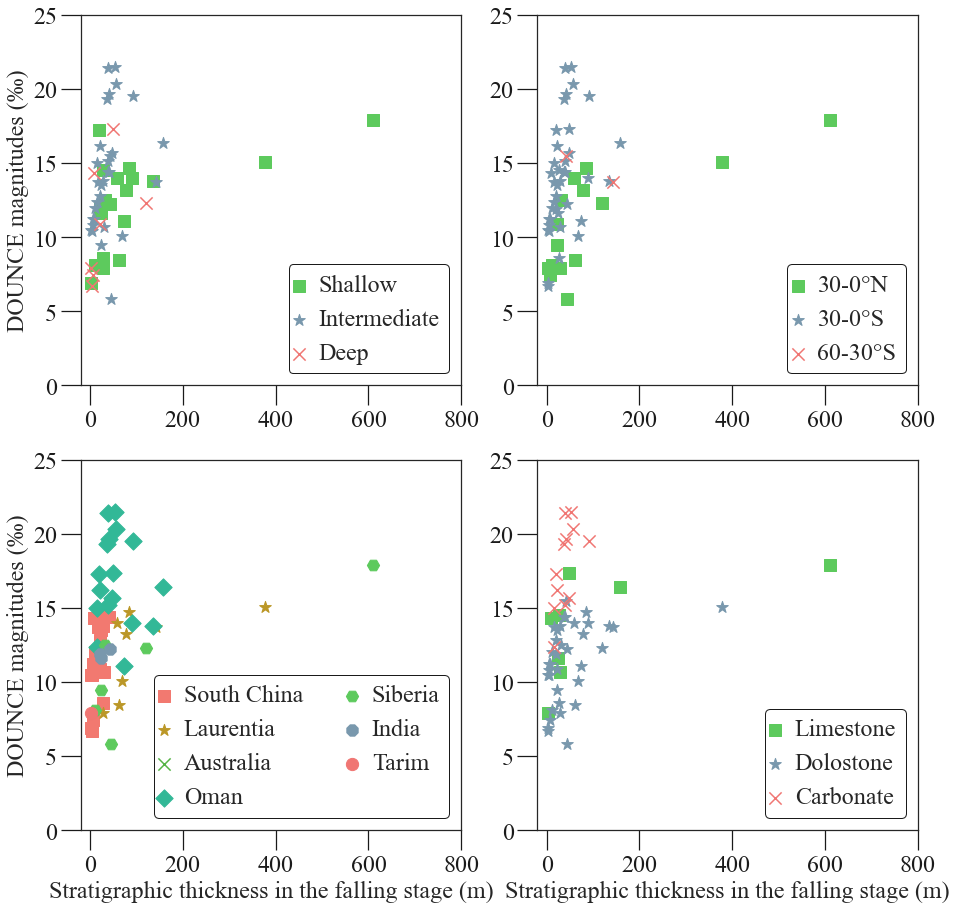

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_excel('./Database/DOUNCE_advanced_summary.xlsx')

# data = data[data['Continent'] != 'South China']

Facies = ['Shallow', 'Intermediate', 'Deep']
Colors = ['#5DCA5D', '#7998AD', '#F07673']
Markers = ['s', '*', 'x']
# Markers = ['s', 'd', 'D'， '*', 'H', '-', '8', 'x', 'p']

grid = plt.GridSpec(nrows=9, ncols=9, wspace=0, hspace=0)

# 设置整个图像大小。
plt.figure(figsize=(15, 15))

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Times New Roman'

plt.rcParams['font.size'] = 24

# 第一个子图的具体排列位置为(0,0)。
fig1 = plt.subplot(2, 2, 1)

for face in Facies:
    idx = Facies.index(face)
    magnitude_data = data[data['Water_depth'] == face]
    #     # type 1: use all the real magnitude data
    #     magnitude_data = magnitude_data[magnitude_data['Magnitude'] >0]['Magnitude']
    # type 2: use all the real magnitude data only with Pre-Lowest
    magnitude_data = magnitude_data[magnitude_data['Magnitude'] > 0]
    magnitude_data = magnitude_data[magnitude_data['Mag_cal_method'] ==
                                    'Pre-LOWEST']['Magnitude']

    height_data = data[data['Water_depth'] == face]
    #     # type 1: use all the real magnitude data
    #     height_data = height_data[height_data['Magnitude'] >0]['Sec/Bor Heights']
    # type 2: use all the real magnitude data only with Pre-Lowest
    height_data = height_data[height_data['Magnitude'] > 0]
    height_data = height_data[height_data['Mag_cal_method'] ==
                              'Pre-LOWEST']['ST_Falling']

    plt.scatter(height_data,
                magnitude_data,
                marker=Markers[idx],
                color=Colors[idx],
                s=150,
                label=str(face))
plt.xlim(-20, 800)
plt.ylim(0, 25)
# plt.xlabel('Stratigraphic thickness (m)')
plt.ylabel('DOUNCE magnitudes (‰)', fontsize=24)
plt.legend(fontsize=24,
           loc='best',
           framealpha=1,
           edgecolor='k',
           handlelength=0.05,
           handleheight=0.5)
plt.tick_params(axis='both',
                colors='k',
                labelsize=24,
                direction='out',
                length=20)

Lat_band = ['30-0°N', '30-0°S', '60-30°S']
Colors = ['#5DCA5D', '#7998AD', '#F07673']
Markers = ['s', '*', 'x']
fig2 = plt.subplot(2, 2, 2, sharex=fig1, sharey=fig1)
for band in Lat_band:
    idx = Lat_band.index(band)
    magnitude_data = data[data['PaleoLati'] == band]
    #     # type 1: use all the real magnitude data
    #     magnitude_data = magnitude_data[magnitude_data['Magnitude'] >0]['Magnitude']
    # type 2: use all the real magnitude data only with Pre-Lowest
    magnitude_data = magnitude_data[magnitude_data['Magnitude'] > 0]
    magnitude_data = magnitude_data[magnitude_data['Mag_cal_method'] ==
                                    'Pre-LOWEST']['Magnitude']

    height_data = data[data['PaleoLati'] == band]
    #     # type 1: use all the real magnitude data
    #     height_data = height_data[height_data['Magnitude'] >0]['Sec/Bor Heights']
    # type 2: use all the real magnitude data only with Pre-Lowest
    height_data = height_data[height_data['Magnitude'] > 0]
    height_data = height_data[height_data['Mag_cal_method'] ==
                              'Pre-LOWEST']['ST_Falling']

    plt.scatter(height_data,
                magnitude_data,
                marker=Markers[idx],
                color=Colors[idx],
                s=150,
                label=band)

plt.legend(fontsize=24,
           loc='best',
           framealpha=1,
           edgecolor='k',
           handlelength=0.05,
           handleheight=0.5)
plt.tick_params(axis='both',
                colors='k',
                labelsize=24,
                direction='out',
                length=20)

fig3 = plt.subplot(2, 2, 3, sharex=fig1, sharey=fig1)
Continents = [
    'South China', 'Laurentia', 'Australia', 'Oman', 'Siberia', 'India',
    'Tarim'
]
Colors = [
    '#F27970', '#BB9727', '#54B345', '#32B897', '#5DCA5D', '#7998AD', '#F07673'
]
Markers = ['s', '*', 'x', 'D', 'H', '8', 'o']
for continent in Continents:
    idx = Continents.index(continent)
    magnitude_data = data[data['Pcont'] == continent]
    #     # type 1: use all the real magnitude data
    #     magnitude_data = magnitude_data[magnitude_data['Magnitude'] >0]['Magnitude']
    # type 2: use all the real magnitude data only with Pre-Lowest
    magnitude_data = magnitude_data[magnitude_data['Magnitude'] > 0]
    magnitude_data = magnitude_data[magnitude_data['Mag_cal_method'] ==
                                    'Pre-LOWEST']['Magnitude']
    height_data = data[data['Pcont'] == continent]
    #     # type 1: use all the real magnitude data
    #     height_data = height_data[height_data['Magnitude'] >0]['Sec/Bor Heights']
    # type 2: use all the real magnitude data only with Pre-Lowest
    height_data = height_data[height_data['Magnitude'] > 0]
    height_data = height_data[height_data['Mag_cal_method'] ==
                              'Pre-LOWEST']['ST_Falling']
    plt.scatter(height_data,
                magnitude_data,
                marker=Markers[idx],
                color=Colors[idx],
                s=150,
                label=str(continent))

plt.xlabel('Stratigraphic thickness in the falling stage (m)', fontsize=24)
plt.ylabel('DOUNCE magnitudes (‰)', fontsize=24)
plt.legend(fontsize=24,
           loc='best',
           framealpha=1,
           edgecolor='k',
           ncol=2,
           handlelength=0.05,
           handleheight=0.5)
plt.tick_params(axis='both',
                colors='k',
                labelsize=24,
                direction='out',
                length=20)

Lat_band = ['Limestone', 'Dolostone', 'Carbonate']
Colors = ['#5DCA5D', '#7998AD', '#F07673']
fig4 = plt.subplot(2, 2, 4, sharex=fig1, sharey=fig1)
for band in Lat_band:
    idx = Lat_band.index(band)
    magnitude_data = data[data['Lithology'] == band]
    #     # type 1: use all the real magnitude data
    #     magnitude_data = magnitude_data[magnitude_data['Magnitude'] >0]['Magnitude']
    # type 2: use all the real magnitude data only with Pre-Lowest
    magnitude_data = magnitude_data[magnitude_data['Magnitude'] > 0]
    magnitude_data = magnitude_data[magnitude_data['Mag_cal_method'] ==
                                    'Pre-LOWEST']['Magnitude']

    height_data = data[data['Lithology'] == band]

    #     # type 1: use all the real magnitude data
    #     height_data = height_data[height_data['Magnitude'] >0]['Sec/Bor Heights']
    # type 2: use all the real magnitude data only with Pre-Lowest
    height_data = height_data[height_data['Magnitude'] > 0]
    height_data = height_data[height_data['Mag_cal_method'] ==
                              'Pre-LOWEST']['ST_Falling']

    plt.scatter(height_data,
                magnitude_data,
                marker=Markers[idx],
                color=Colors[idx],
                s=150,
                label=band)

plt.xlabel('Stratigraphic thickness in the falling stage (m)', fontsize=24)
plt.legend(fontsize=24,
           loc='best',
           framealpha=1,
           edgecolor='k',
           handlelength=0.05,
           handleheight=0.5)
plt.tick_params(axis='both',
                colors='k',
                labelsize=24,
                direction='out',
                length=20)

plt.savefig('./Database/C_isotopes_figures/Mag_vs_ST_Falling.pdf')

## Figure to show the DOUNCE magnitudes vs. Stratigraphic thickness (ST)

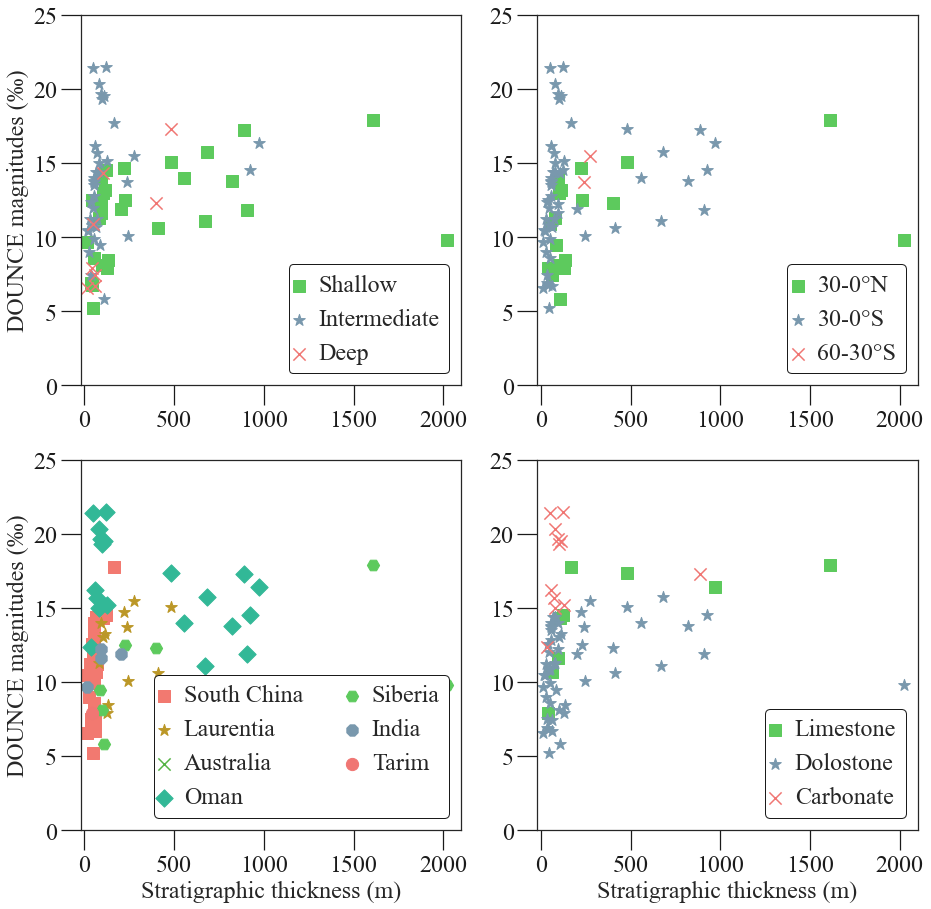

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  

data = pd.read_excel('./Database/DOUNCE_advanced_summary.xlsx')

# data = data[data['Continent'] != 'South China']

Facies = ['Shallow','Intermediate', 'Deep']
Colors = ['#5DCA5D', '#7998AD', '#F07673']
Markers = ['s', '*', 'x']
# Markers = ['s', 'd', 'D'， '*', 'H', '-', '8', 'x', 'p']

grid = plt.GridSpec(nrows=9, ncols=9, wspace=0, hspace=0)

# 设置整个图像大小。
plt.figure(figsize = (15, 15))  

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Times New Roman'

plt.rcParams['font.size'] = 24

# 第一个子图的具体排列位置为(0,0)。
fig1 = plt.subplot(2,2,1)

for face in Facies:
    idx = Facies.index(face)
    magnitude_data = data[data['Water_depth'] == face]
#     # type 1: use all the real magnitude data
#     magnitude_data = magnitude_data[magnitude_data['Magnitude'] >0]['Magnitude']
    # type 2: use all the real magnitude data only with Pre-Lowest
    magnitude_data = magnitude_data[magnitude_data['Magnitude'] >0]
    magnitude_data = magnitude_data[magnitude_data['Mag_cal_method'] == 'Pre-LOWEST']['Magnitude']
    
    height_data = data[data['Water_depth'] == face]
#     # type 1: use all the real magnitude data
#     height_data = height_data[height_data['Magnitude'] >0]['Sec/Bor Heights']
    # type 2: use all the real magnitude data only with Pre-Lowest
    height_data = height_data[height_data['Magnitude'] >0]
    height_data =  height_data[height_data['Mag_cal_method'] == 'Pre-LOWEST']['ST']
    
    plt.scatter(height_data, magnitude_data, marker = Markers[idx], color = Colors[idx], s = 150, label = str(face))
plt.xlim(-20, 2100)
plt.ylim(0, 25)
# plt.xlabel('Stratigraphic thickness (m)')
plt.ylabel('DOUNCE magnitudes (‰)', fontsize = 24)
plt.legend(fontsize = 24, loc = 'best', framealpha = 1, edgecolor = 'k', handlelength = 0.05, handleheight = 0.5)
plt.tick_params(axis='both', colors='k',labelsize=24, direction = 'out', length = 20)



Lat_band = ['30-0°N', '30-0°S', '60-30°S']
Colors = ['#5DCA5D', '#7998AD', '#F07673']
Markers = ['s', '*', 'x']
fig2 = plt.subplot(2,2,2, sharex =fig1, sharey =fig1)
for band in Lat_band:
    idx = Lat_band.index(band)
    magnitude_data = data[data['PaleoLati'] == band]
#     # type 1: use all the real magnitude data
#     magnitude_data = magnitude_data[magnitude_data['Magnitude'] >0]['Magnitude']
    # type 2: use all the real magnitude data only with Pre-Lowest
    magnitude_data = magnitude_data[magnitude_data['Magnitude'] >0]
    magnitude_data = magnitude_data[magnitude_data['Mag_cal_method'] == 'Pre-LOWEST']['Magnitude']
    
    height_data = data[data['PaleoLati'] == band]
#     # type 1: use all the real magnitude data
#     height_data = height_data[height_data['Magnitude'] >0]['Sec/Bor Heights']
    # type 2: use all the real magnitude data only with Pre-Lowest
    height_data = height_data[height_data['Magnitude'] >0]
    height_data =  height_data[height_data['Mag_cal_method'] == 'Pre-LOWEST']['ST']
    
    plt.scatter(height_data, magnitude_data, marker = Markers[idx], color = Colors[idx], s = 150, label = band)

plt.legend(fontsize = 24, loc = 'best', framealpha = 1, edgecolor = 'k', handlelength = 0.05, handleheight = 0.5)
plt.tick_params(axis='both', colors='k',labelsize=24, direction = 'out', length = 20)

fig3 = plt.subplot(2,2,3, sharex = fig1, sharey = fig1)
Continents = ['South China', 'Laurentia', 'Australia', 'Oman', 'Siberia','India', 'Tarim']
Colors = ['#F27970','#BB9727','#54B345','#32B897', '#5DCA5D', '#7998AD', '#F07673']
Markers = ['s', '*', 'x', 'D', 'H', '8', 'o']
for continent in Continents:
    idx = Continents.index(continent)
    magnitude_data = data[data['Pcont'] == continent]
#     # type 1: use all the real magnitude data
#     magnitude_data = magnitude_data[magnitude_data['Magnitude'] >0]['Magnitude']
    # type 2: use all the real magnitude data only with Pre-Lowest
    magnitude_data = magnitude_data[magnitude_data['Magnitude'] >0]
    magnitude_data = magnitude_data[magnitude_data['Mag_cal_method'] == 'Pre-LOWEST']['Magnitude']
    height_data = data[data['Pcont'] == continent]
#     # type 1: use all the real magnitude data
#     height_data = height_data[height_data['Magnitude'] >0]['Sec/Bor Heights']
    # type 2: use all the real magnitude data only with Pre-Lowest
    height_data = height_data[height_data['Magnitude'] >0]
    height_data =  height_data[height_data['Mag_cal_method'] == 'Pre-LOWEST']['ST']
    plt.scatter(height_data, magnitude_data, marker = Markers[idx], color = Colors[idx], s = 150, label = str(continent))

plt.xlabel('Stratigraphic thickness (m)',fontsize = 24)
plt.ylabel('DOUNCE magnitudes (‰)',fontsize = 24)
plt.legend(fontsize = 24, loc = 'best', framealpha = 1, edgecolor = 'k', ncol = 2, handlelength = 0.05, handleheight = 0.5)
plt.tick_params(axis='both', colors='k', labelsize=24,direction = 'out', length = 20)


Lat_band = ['Limestone', 'Dolostone', 'Carbonate']
Colors = ['#5DCA5D', '#7998AD', '#F07673']
fig4 = plt.subplot(2,2,4, sharex = fig1, sharey = fig1)  
for band in Lat_band:
    idx = Lat_band.index(band)
    magnitude_data = data[data['Lithology'] == band]
#     # type 1: use all the real magnitude data
#     magnitude_data = magnitude_data[magnitude_data['Magnitude'] >0]['Magnitude']
    # type 2: use all the real magnitude data only with Pre-Lowest
    magnitude_data = magnitude_data[magnitude_data['Magnitude'] >0]
    magnitude_data = magnitude_data[magnitude_data['Mag_cal_method'] == 'Pre-LOWEST']['Magnitude']
    
    
    height_data = data[data['Lithology'] == band]
    
#     # type 1: use all the real magnitude data
#     height_data = height_data[height_data['Magnitude'] >0]['Sec/Bor Heights']
    # type 2: use all the real magnitude data only with Pre-Lowest
    height_data = height_data[height_data['Magnitude'] >0]
    height_data =  height_data[height_data['Mag_cal_method'] == 'Pre-LOWEST']['ST']
    
    plt.scatter(height_data, magnitude_data, marker = Markers[idx], color = Colors[idx], s = 150, label = band)

plt.xlabel('Stratigraphic thickness (m)',fontsize = 24)
plt.legend(fontsize = 24, loc = 'best', framealpha = 1, edgecolor = 'k', handlelength = 0.05, handleheight = 0.5)
plt.tick_params(axis='both', colors='k', labelsize=24,direction = 'out', length = 20)


plt.savefig('./Database/C_isotopes_figures/Mag_vs_ST.pdf')

## ST_falling (m) distributions to the category (water depth, latitudes, continents, lithology)

<Figure size 1080x1440 with 0 Axes>

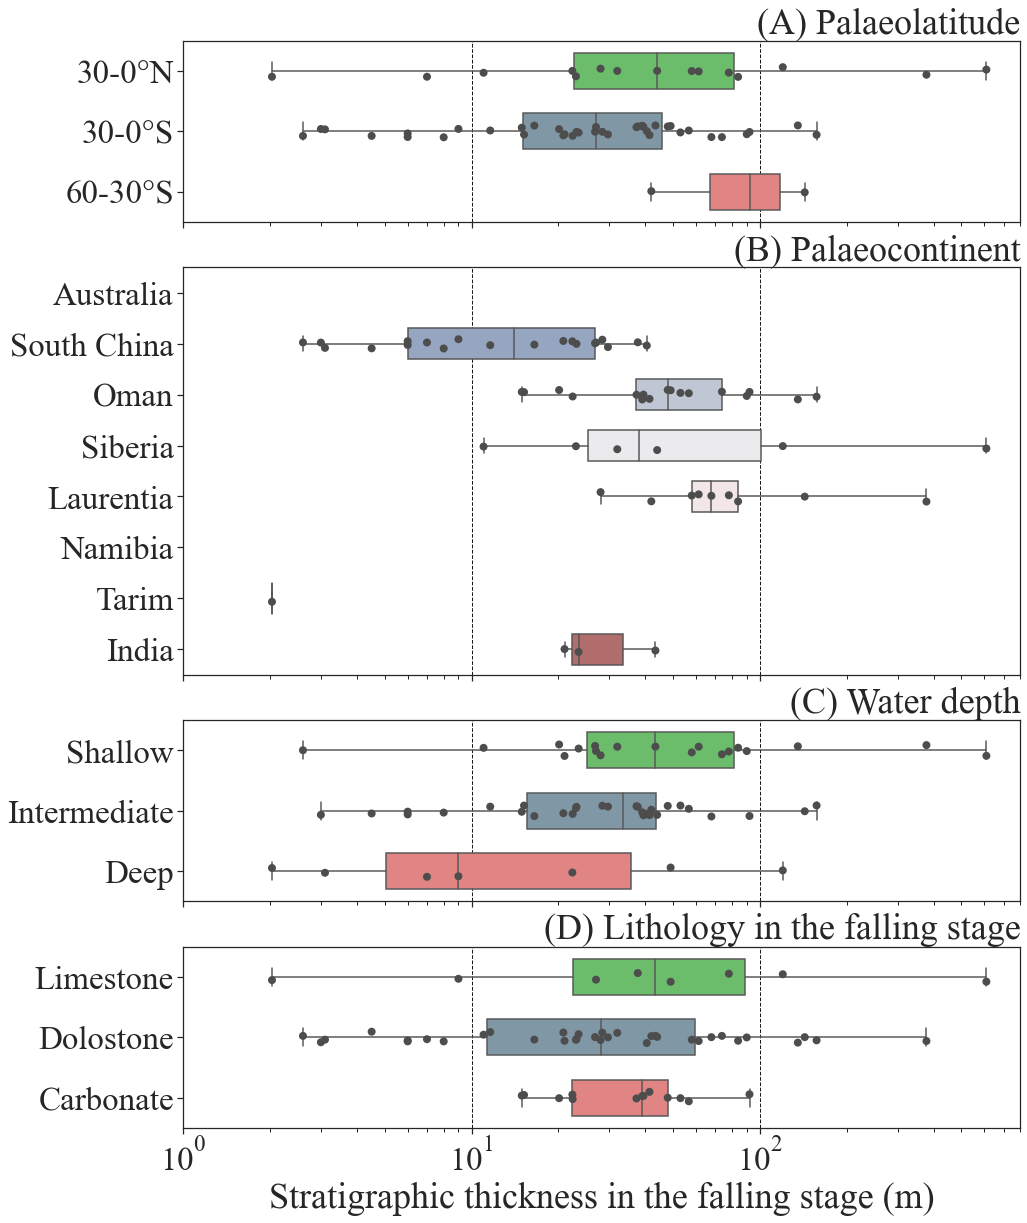

In [97]:
'''
Box and whisker plots illustrate the ST_Falling thickness
'''

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  

sns.set_theme(style = 'ticks', font_scale= 3)
plt.rcParams['font.sans-serif'] =['Times New Roman']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
figure = plt.figure(figsize = (15, 20))

grid = plt.GridSpec(nrows=17, ncols=1, wspace=0, hspace=0)

data = pd.read_excel('./Database/DOUNCE_advanced_summary.xlsx')
'''
Box and whisker plots illustrate the ST thickness
'''

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  

sns.set_theme(style = 'ticks', font_scale= 3)
plt.rcParams['font.sans-serif'] =['Times New Roman']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
figure = plt.figure(figsize = (15, 20))

grid = plt.GridSpec(nrows=24, ncols=1, wspace=0, hspace=0)



data = pd.read_excel('./Database/DOUNCE_advanced_summary.xlsx')


fig1 = plt.subplot(grid[0:4,0])
# Plot the orbital period with horizontal boxes
sns.boxplot(x="ST_Falling", y="PaleoLati", data=data,
            whis=[0, 100], width=.6, palette=['#5DCA5D', '#7998AD', '#F07673'], order= ['30-0°N', '30-0°S', '60-30°S'])

# Add in points to show each observation
sns.stripplot(x="ST_Falling", y="PaleoLati", data=data,
              size=8, color=".3", linewidth=0, order= ['30-0°N', '30-0°S', '60-30°S'])

# Tweak the visual presentation
fig1.xaxis.grid(True,linestyle = '--', color = 'k')
# fig1.set_xlim(0,400)
fig1.set(ylabel="",xlabel = '')
fig1.set_xscale('log')
fig1.set_xticklabels([])

fig1.set_xlim(1,800)

fig1.set_title('(A) Palaeolatitude', loc='right')

fig2 = plt.subplot(grid[5:14,0], sharex = fig1)
# Plot the orbital period with horizontal boxes
sns.boxplot(x="ST_Falling", y="Pcont", data=data,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="ST_Falling", y="Pcont", data=data,
              size=8, color=".3", linewidth=0)

# Tweak the visual presentation
fig2.xaxis.grid(True,linestyle = '--', color = 'k')
fig2.set(ylabel="",xlabel = '')

fig2.set_title('(B) Palaeocontinent', loc='right')
fig2.set_xticklabels([])

fig3 = plt.subplot(grid[15:19,0], sharex = fig1)
# Plot the orbital period with horizontal boxes
sns.boxplot(x="ST_Falling", y="Water_depth", data=data,
            whis=[0, 100], width=.6, palette=['#5DCA5D', '#7998AD', '#F07673'], order= ['Shallow', 'Intermediate', 'Deep'])

# Add in points to show each observation
sns.stripplot(x="ST_Falling", y="Water_depth", data=data,
              size=8, color=".3", linewidth=0, order= ['Shallow', 'Intermediate', 'Deep'])

# Tweak the visual presentation
fig3.xaxis.grid(True,linestyle = '--', color = 'k')
fig3.set(ylabel="",xlabel = '')

fig3.set_title('(C) Water depth', loc='right')
fig3.set_xticklabels([])

fig4 = plt.subplot(grid[20:24,0])
# Plot the orbital period with horizontal boxes
sns.boxplot(x="ST_Falling", y="Fall_lithology", data=data,
            whis=[0, 100], width=.6, palette=['#5DCA5D', '#7998AD', '#F07673'], order= ['Limestone', 'Dolostone', 'Carbonate'])

# Add in points to show each observation
sns.stripplot(x="ST_Falling", y="Fall_lithology", data=data,
              size=8, color=".3", linewidth=0, order= ['Limestone', 'Dolostone', 'Carbonate'])

# Tweak the visual presentation
fig4.xaxis.grid(True,linestyle = '--', color = 'k')
fig4.set(ylabel="", xlabel = 'Stratigraphic thickness in the falling stage (m)')

fig4.set_xscale('log')

fig4.set_xlim(1,800)
fig4.set_title('(D) Lithology in the falling stage', loc='right')

plt.savefig('./Database/C_isotopes_figures/ST_Fallings.pdf', bbox_inches = 'tight')


## ST (m) distributions to the category (water depth, latitudes, continents, lithology)

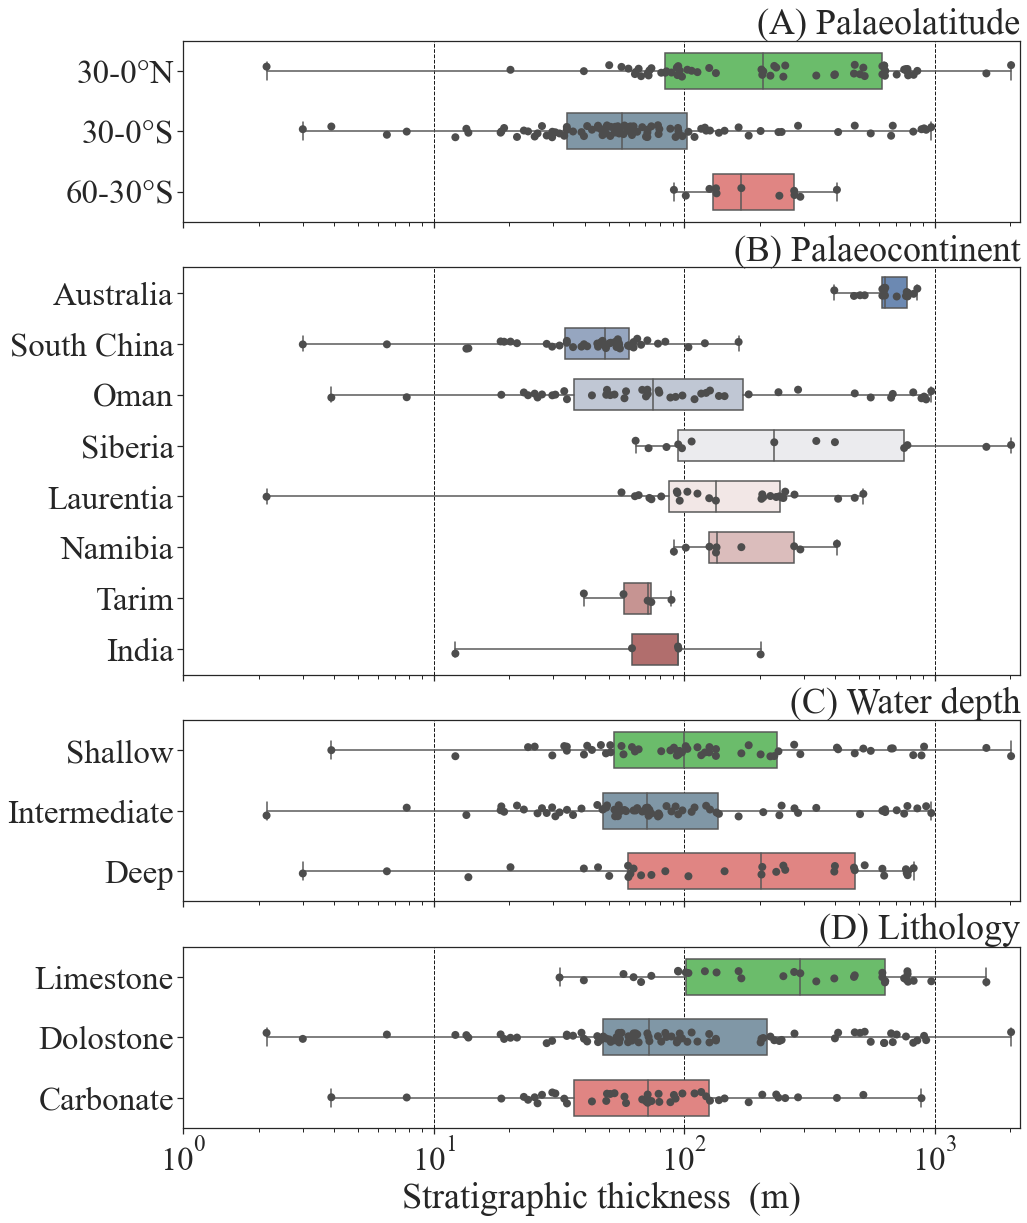

In [98]:
'''
Box and whisker plots illustrate the ST thickness
'''

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  

sns.set_theme(style = 'ticks', font_scale= 3)
plt.rcParams['font.sans-serif'] =['Times New Roman']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
figure = plt.figure(figsize = (15, 20))

grid = plt.GridSpec(nrows=24, ncols=1, wspace=0, hspace=0)



data = pd.read_excel('./Database/DOUNCE_advanced_summary.xlsx')
# only use the PRE-LOWEST
# data = data[data['Mag_cal_method'] == 'Pre-LOWEST']
# data = data[data['ST'] > 0]

fig1 = plt.subplot(grid[0:4,0])
# Plot the orbital period with horizontal boxes
sns.boxplot(x="ST", y="PaleoLati", data=data,
            whis=[0, 100], width=.6, palette=['#5DCA5D', '#7998AD', '#F07673'], order= ['30-0°N', '30-0°S', '60-30°S'])

# Add in points to show each observation
sns.stripplot(x="ST", y="PaleoLati", data=data,
              size=8, color=".3", linewidth=0, order= ['30-0°N', '30-0°S', '60-30°S'])

# Tweak the visual presentation
fig1.xaxis.grid(True,linestyle = '--', color = 'k')
# fig1.set_xlim(0,400)
fig1.set(ylabel="",xlabel = '')
fig1.set_xscale('log')
fig1.set_xticklabels([])

fig1.set_xlim(1, 2200)

fig1.set_title('(A) Palaeolatitude', loc='right')

fig2 = plt.subplot(grid[5:14,0], sharex = fig1)
# Plot the orbital period with horizontal boxes
sns.boxplot(x="ST", y="Pcont", data=data,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="ST", y="Pcont", data=data,
              size=8, color=".3", linewidth=0)

# Tweak the visual presentation
fig2.xaxis.grid(True,linestyle = '--', color = 'k')
fig2.set(ylabel="",xlabel = '')

fig2.set_title('(B) Palaeocontinent', loc='right')
fig2.set_xticklabels([])

fig3 = plt.subplot(grid[15:19,0], sharex = fig1)
# Plot the orbital period with horizontal boxes
sns.boxplot(x="ST", y="Water_depth", data=data,
            whis=[0, 100], width=.6, palette=['#5DCA5D', '#7998AD', '#F07673'], order= ['Shallow', 'Intermediate', 'Deep'])

# Add in points to show each observation
sns.stripplot(x="ST", y="Water_depth", data=data,
              size=8, color=".3", linewidth=0, order= ['Shallow', 'Intermediate', 'Deep'])

# Tweak the visual presentation
fig3.xaxis.grid(True,linestyle = '--', color = 'k')
fig3.set(ylabel="",xlabel = '')

fig3.set_title('(C) Water depth', loc='right')
fig3.set_xticklabels([])

fig4 = plt.subplot(grid[20:24,0])
# Plot the orbital period with horizontal boxes
sns.boxplot(x="ST", y="Lithology", data=data,
            whis=[0, 100], width=.6, palette=['#5DCA5D', '#7998AD', '#F07673'], order= ['Limestone', 'Dolostone', 'Carbonate'])

# Add in points to show each observation
sns.stripplot(x="ST", y="Lithology", data=data,
              size=8, color=".3", linewidth=0, order= ['Limestone', 'Dolostone', 'Carbonate'])

# Tweak the visual presentation
fig4.xaxis.grid(True,linestyle = '--', color = 'k')
fig4.set(ylabel="", xlabel = 'Stratigraphic thickness  (m)')

fig4.set_xscale('log')

fig4.set_xlim(1, 2200)
fig4.set_title('(D) Lithology', loc='right')


plt.savefig('./Database/C_isotopes_figures/ST_total.pdf', bbox_inches = 'tight')

## DOUNCE magnitudes distributions to the category (water depth, latitudes, continents, lithology)

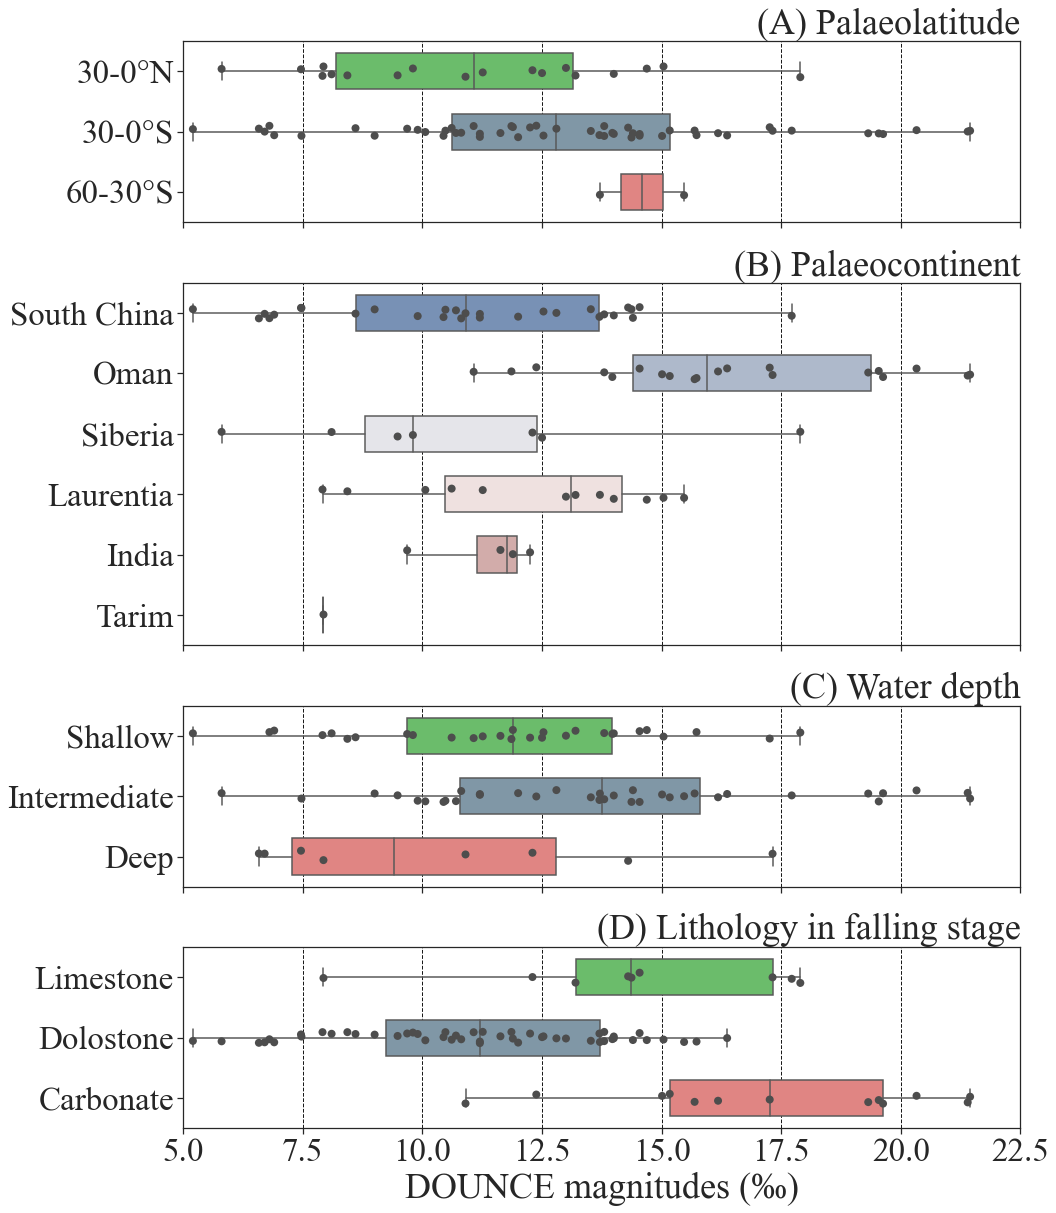

In [99]:
'''
Box and whisker plots illustrate the magnitude of the d13C excursion
'''

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_theme(style='ticks', font_scale=3)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = 24

figure = plt.figure(figsize=(15, 20))

grid = plt.GridSpec(nrows=18, ncols=1, wspace=0, hspace=0)

data = pd.read_excel('./Database/DOUNCE_advanced_summary.xlsx')
# only use the PRE-LOWEST
data = data[data['Mag_cal_method'] == 'Pre-LOWEST']
data = data[data['Magnitude'] > 0]

fig1 = plt.subplot(grid[0:3, 0])
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Magnitude",
            y="PaleoLati",
            data=data,
            whis=[0, 100],
            width=.6,
            palette=['#5DCA5D', '#7998AD', '#F07673'],
            order=['30-0°N', '30-0°S', '60-30°S'])

# Add in points to show each observation
sns.stripplot(x="Magnitude",
              y="PaleoLati",
              data=data,
              size=8,
              color=".3",
              linewidth=0,
              order=['30-0°N', '30-0°S', '60-30°S'])

# Tweak the visual presentation
fig1.xaxis.grid(True, linestyle='--', color='k')
fig1.set(ylabel="", xlabel='')
fig1.set_xticklabels([])
fig1.set_xlim(5, 22.5)

fig1.set_title('(A) Palaeolatitude', loc='right')

fig2 = plt.subplot(grid[4:10, 0], sharex=fig1)
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Magnitude",
            y="Pcont",
            data=data,
            whis=[0, 100],
            width=.6,
            palette="vlag")

# Add in points to show each observation
sns.stripplot(x="Magnitude",
              y="Pcont",
              data=data,
              size=8,
              color=".3",
              linewidth=0)

# Tweak the visual presentation
fig2.xaxis.grid(True, linestyle='--', color='k')
fig2.set(ylabel="", xlabel='')
fig2.set_title('(B) Palaeocontinent', loc='right')

fig3 = plt.subplot(grid[11:14, 0], sharex=fig1)
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Magnitude",
            y="Water_depth",
            data=data,
            whis=[0, 100],
            width=.6,
            palette=['#5DCA5D', '#7998AD', '#F07673'],
            order=['Shallow', 'Intermediate', 'Deep'])

# Add in points to show each observation
sns.stripplot(x="Magnitude",
              y="Water_depth",
              data=data,
              size=8,
              color=".3",
              linewidth=0,
              order=['Shallow', 'Intermediate', 'Deep'])

# Tweak the visual presentation
fig3.xaxis.grid(True, linestyle='--', color='k')
fig3.set(ylabel="", xlabel='')

fig3.set_title('(C) Water depth', loc='right')

fig4 = plt.subplot(grid[15:18, 0])
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Magnitude",
            y="Fall_lithology",
            data=data,
            whis=[0, 100],
            width=.6,
            palette=['#5DCA5D', '#7998AD', '#F07673'],
            order=['Limestone', 'Dolostone', 'Carbonate'])

# Add in points to show each observation
sns.stripplot(x="Magnitude",
              y="Fall_lithology",
              data=data,
              size=8,
              color=".3",
              linewidth=0,
              order=['Limestone', 'Dolostone', 'Carbonate'])

# Tweak the visual presentation
fig4.xaxis.grid(True, linestyle='--', color='k')
fig4.set(ylabel="", xlabel='DOUNCE magnitudes (‰)')
fig4.set_xlim(5, 22.5)


fig4.set_title('(D) Lithology in falling stage', loc='right')

plt.savefig('./Database/C_isotopes_figures/Magnitudes.pdf')

## C isotopes distributions in each DOUNCE stage with different palaeolatitudes

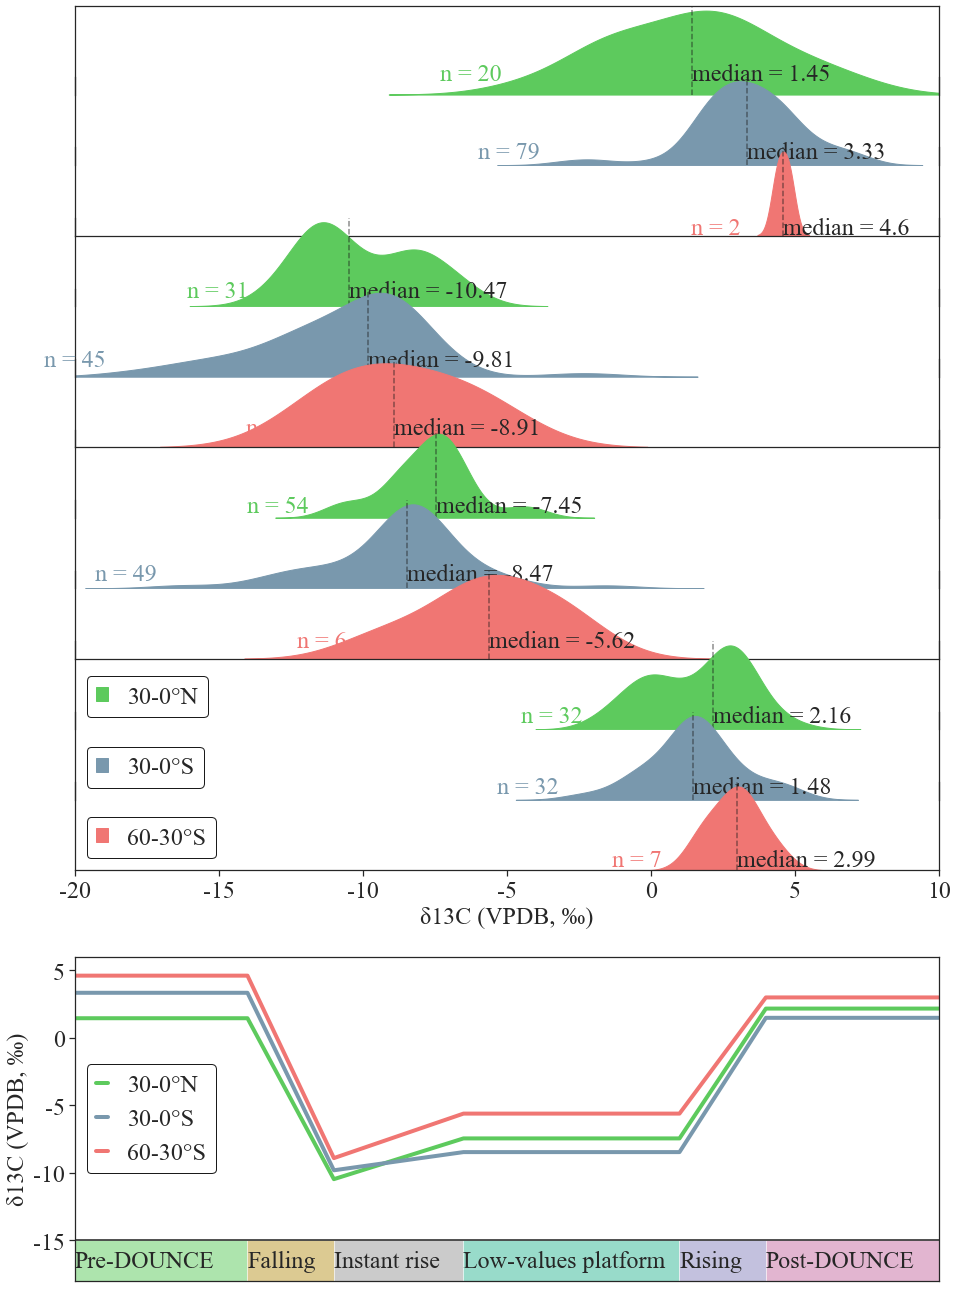

In [101]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_excel('./Database/DOUNCE_advanced_summary.xlsx')

figure = plt.figure(figsize=(15, 15))
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.size'] = 24

Latitudes = ['30-0°N', '30-0°S', '60-30°S']
# each color represent each continents, continents in the same paleolatitudes zone are assigned with the same color
Colors = ['#5DCA5D', '#7998AD', '#F07673']
# Trasparent degree to distinguish different continents
Alpha = [1, 1, 1]

DOUNCE_stage = ['Pre_med', 'Lowest_C', 'Platform_med', 'Post_med']

Lati_variable = ['N30_0', 'S30_0', 'S60_30']

N30_0 = []
S30_0 = []
S60_30 = []

for stage_value in DOUNCE_stage:
    for lati, color1, alpha1 in zip(Latitudes, Colors, Alpha):
        id_stage = DOUNCE_stage.index(stage_value)
        id_lat = Latitudes.index(lati)

        plot_id = (id_stage) * len(Latitudes) + (id_lat + 1)

        fig = plt.subplot(len(DOUNCE_stage) * len(Latitudes), 1, plot_id)

        if plot_id == 1:
            fig.spines['bottom'].set_visible(False)
            fig.patch.set_visible(False)
            fig.grid(color='k', linestyle='--')
            plt.yticks([])
            plt.xticks([])
        elif plot_id == len(DOUNCE_stage) * len(Latitudes):
            fig.spines['top'].set_visible(False)
            fig.patch.set_visible(False)
            plt.yticks([])
            plt.xticks([-20, -15, -10, -5, 0, 5, 10], fontsize=24)

        elif int(plot_id) % len(Latitudes) == 0:

            fig.spines['top'].set_visible(False)
            fig.patch.set_visible(False)
            fig.grid(color='k', linestyle='--')
            plt.yticks([])
            plt.xticks([])
        else:
            fig.patch.set_visible(False)
            fig.spines['top'].set_visible(False)
            fig.spines['bottom'].set_visible(False)
            fig.patch.set_visible(False)
            fig.grid(color='k', linestyle='--')
            plt.yticks([])
            plt.xticks([])

        data_plot = data[data['PaleoLati'] ==
                         lati][stage_value].dropna().values

        sns.kdeplot(data_plot,
                    fill=True,
                    alpha=alpha1,
                    color=color1,
                    label=lati)

        plt.axvline(x=np.median(data_plot),
                    linestyle='--',
                    color='k',
                    alpha=0.5)

        plt.text(round(np.median(data_plot), 2),
                 .02,
                 'median = ' + str(round(np.median(data_plot), 2)),
                 fontsize=24)

        vars()[Lati_variable[id_lat]].append(np.median(data_plot))

        plt.text(round(np.min(data_plot) - 3, 2),
                 .02,
                 'n = ' + str(len(data_plot)),
                 fontsize=24,
                 color=color1,
                 alpha=alpha1)
        fig.set_xlim(-20, 10)
        if plot_id >= len(DOUNCE_stage) * len(Latitudes) - len(Latitudes) + 1:
            plt.legend(fontsize=24,
                       loc='lower left',
                       framealpha=1,
                       edgecolor='k',
                       handlelength=0.5,
                       handleheight=0.5)

plt.xlabel('δ13C (VPDB, ‰)', fontsize=24)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.1,
                    hspace=-0.2)

stages_portions = [0, 0.2, 0.3, 0.45, 0.7, 0.8, 1.0]

ax2 = figure.add_axes([0.1, -0.28, 0.8, 0.3])

for lati_va, color in zip(Lati_variable, Colors):

    id_lat_va = Lati_variable.index(lati_va)

    # copy the platform values
    vars()[lati_va].insert(2, vars()[lati_va][2])

    # copy the pre values
    vars()[lati_va].insert(0, vars()[lati_va][0])

    # copy the post values
    vars()[lati_va].insert(-1, vars()[lati_va][-1])

    ax2.plot(stages_portions,
             vars()[lati_va],
             color=color,
             linestyle='-',
             linewidth=4,
             label=Latitudes[id_lat_va])

ax2.set_xlim(0, 1)
ax2.set_ylim(-18, 6)
ax2.legend(fontsize=24,
           loc='center left',
           framealpha=1,
           edgecolor='k',
           handlelength=0.5,
           handleheight=0.5)
ax2.set_ylabel('δ13C (VPDB, ‰)', fontsize=24)
plt.yticks([-15, -10, -5, 0, 5], fontsize=24)
plt.xticks([])

# stage range colors
stage_colors = [
    '#5DCA5D', '#BB9727', '#999999', '#32B897', '#8984BF', '#C76DA2'
]
stage_name = [
    'Pre-DOUNCE', "Falling", "Instant rise", 'Low-values platform', 'Rising',
    'Post-DOUNCE'
]
for stage_id in range(len(stages_portions) - 1):
    ax2.fill_between(
        [stages_portions[stage_id], stages_portions[stage_id + 1]],
        -18,
        -15,
        facecolor=stage_colors[stage_id],
        alpha=0.5)
    ax2.text(stages_portions[stage_id], -17, stage_name[stage_id], fontsize=24)

ax2.axhline(y=-15, xmin=0, xmax=1, linestyle='-', color='k')
figure.savefig('./Database/C_isotopes_figures/C_iso_KDE_LAT.pdf',
               format='pdf',
               bbox_inches='tight')

##  C isotopes distributions in each DOUNCE stage with different water depths

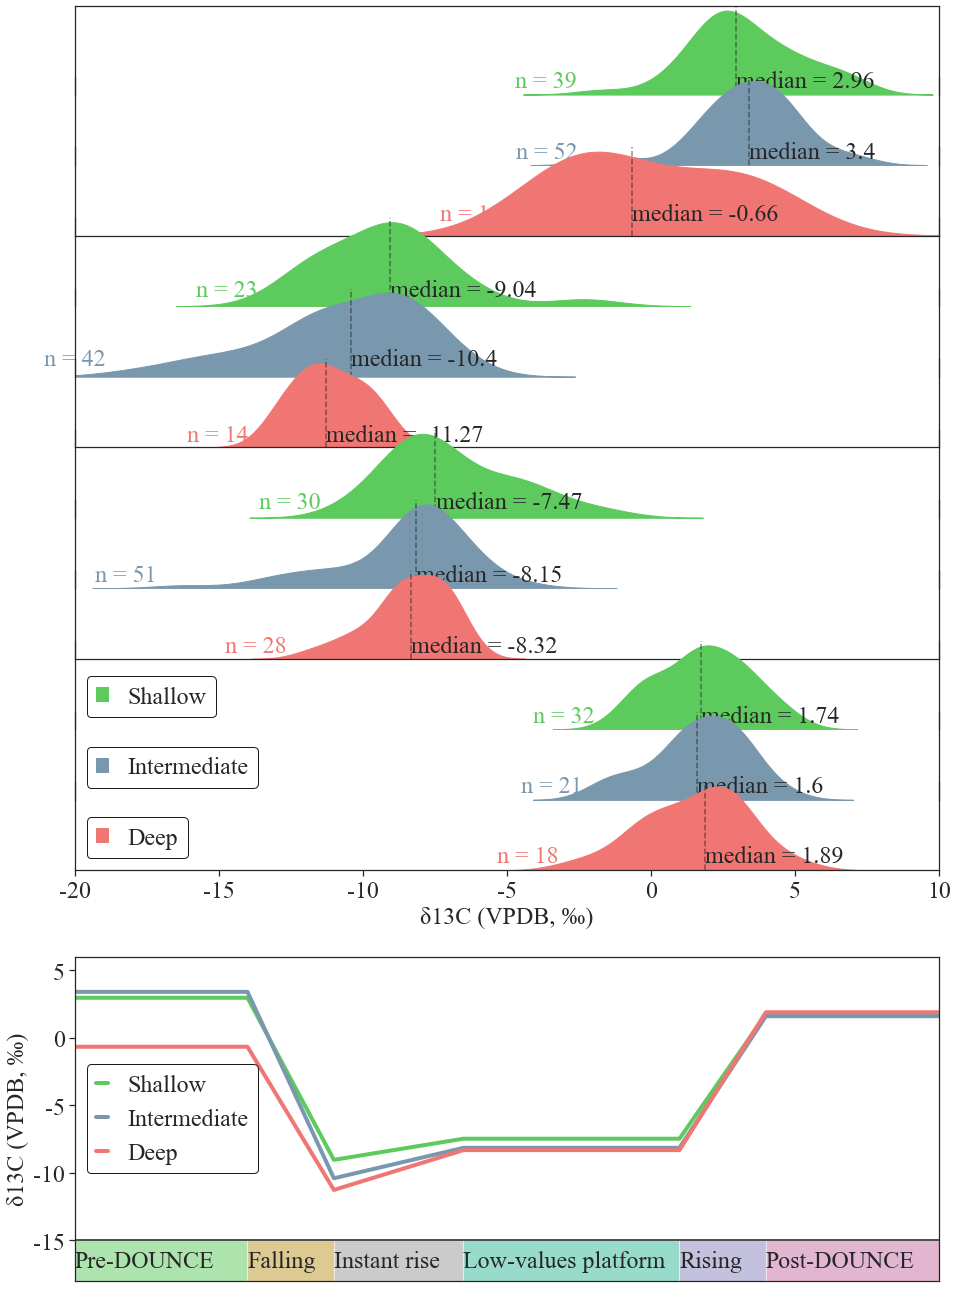

In [102]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_excel('./Database/DOUNCE_advanced_summary.xlsx')

figure = plt.figure(figsize=(15, 15))
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.size'] = 24

Water_depth = ['Shallow', 'Intermediate', 'Deep']
#each color represent each continents, continents in the same paleoWater_depth zone are assigned with the same color
Colors = ['#5DCA5D', '#7998AD', '#F07673']
# Trasparent degree to distinguish different continents
Alpha = [1, 1, 1]

DOUNCE_stage = ['Pre_med', 'Lowest_C', 'Platform_med', 'Post_med']

Water_variable = ['Shallow', 'Intermediate', 'Deep']

Shallow = []
Intermediate = []
Deep = []

for stage_value in DOUNCE_stage:
    for depth, color1, alpha1 in zip(Water_depth, Colors, Alpha):
        id_stage = DOUNCE_stage.index(stage_value)
        id_lat = Water_depth.index(depth)

        plot_id = (id_stage) * len(Water_depth) + (id_lat + 1)

        fig = plt.subplot(len(DOUNCE_stage) * len(Water_depth), 1, plot_id)

        if plot_id == 1:
            fig.spines['bottom'].set_visible(False)
            fig.patch.set_visible(False)
            fig.grid(color='k', linestyle='--')
            plt.yticks([])
            plt.xticks([])
        elif plot_id == len(DOUNCE_stage) * len(Water_depth):
            fig.spines['top'].set_visible(False)
            fig.patch.set_visible(False)
            plt.yticks([])
            plt.xticks([-20, -15, -10, -5, 0, 5, 10], fontsize=24)

        elif int(plot_id) % len(Water_depth) == 0:

            fig.spines['top'].set_visible(False)
            fig.patch.set_visible(False)
            fig.grid(color='k', linestyle='--')
            plt.yticks([])
            plt.xticks([])
        else:
            fig.patch.set_visible(False)
            fig.spines['top'].set_visible(False)
            fig.spines['bottom'].set_visible(False)
            fig.patch.set_visible(False)
            fig.grid(color='k', linestyle='--')
            plt.yticks([])
            plt.xticks([])

        data_plot = data[data['Water_depth'] ==
                         depth][stage_value].dropna().values

        sns.kdeplot(data_plot,
                    fill=True,
                    alpha=alpha1,
                    color=color1,
                    label=depth)

        plt.axvline(x=np.median(data_plot),
                    linestyle='--',
                    color='k',
                    alpha=0.5)

        plt.text(round(np.median(data_plot), 2),
                 .02,
                 'median = ' + str(round(np.median(data_plot), 2)),
                 fontsize=24)

        vars()[Water_variable[id_lat]].append(np.median(data_plot))

        plt.text(round(np.min(data_plot)-3, 2),
                 .02,
                 'n = ' + str(len(data_plot)),
                 fontsize=24,
                 color=color1,
                 alpha=alpha1)
        fig.set_xlim(-20, 10)
        if plot_id >= len(DOUNCE_stage) * len(Water_depth) - len(
                Water_depth) + 1:
            plt.legend(fontsize=24,
                       loc='lower left',
                       framealpha=1,
                       edgecolor='k',
                       handlelength=0.5,
                       handleheight=0.5)

plt.xlabel('δ13C (VPDB, ‰)', fontsize=24)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.1,
                    hspace=-0.2)

stages_portions = [0, 0.2, 0.3, 0.45, 0.7, 0.8, 1.0]

ax2 = figure.add_axes([0.1, -0.28, 0.8, 0.3])

for depth_va, color in zip(Water_variable, Colors):

    id_depth_va = Water_variable.index(depth_va)

    # copy the platform values
    vars()[depth_va].insert(2, vars()[depth_va][2])

    # copy the pre values
    vars()[depth_va].insert(0, vars()[depth_va][0])

    # copy the post values
    vars()[depth_va].insert(-1, vars()[depth_va][-1])

    ax2.plot(stages_portions,
             vars()[depth_va],
             color=color,
             linestyle='-',
             linewidth=4,
             label=Water_depth[id_depth_va])

ax2.set_xlim(0, 1)
ax2.set_ylim(-18, 6)
ax2.legend(fontsize=24,
           loc='center left',
           framealpha=1,
           edgecolor='k',
           handlelength=0.5,
           handleheight=0.5)
ax2.set_ylabel('δ13C (VPDB, ‰)', fontsize=24)
plt.yticks([-15, -10, -5, 0, 5], fontsize=24)
plt.xticks([])

### stage range colors
stage_colors = [
    '#5DCA5D', '#BB9727', '#999999', '#32B897', '#8984BF', '#C76DA2'
]
stage_name = [
    'Pre-DOUNCE', "Falling", "Instant rise", 'Low-values platform', 'Rising',
    'Post-DOUNCE'
]
for stage_id in range(len(stages_portions) - 1):
    ax2.fill_between(
        [stages_portions[stage_id], stages_portions[stage_id + 1]],
        -18,
        -15,
        facecolor=stage_colors[stage_id],
        alpha=0.5)
    ax2.text(stages_portions[stage_id], -17, stage_name[stage_id], fontsize=24)

ax2.axhline(y=-15, xmin=0, xmax=1, linestyle='-', color='k')

figure.savefig('./Database/C_isotopes_figures/C_iso_KDE_WaterD.pdf',
               format='pdf',
               bbox_inches='tight')

## C isotopes distributions in each DOUNCE stage with different lithologies

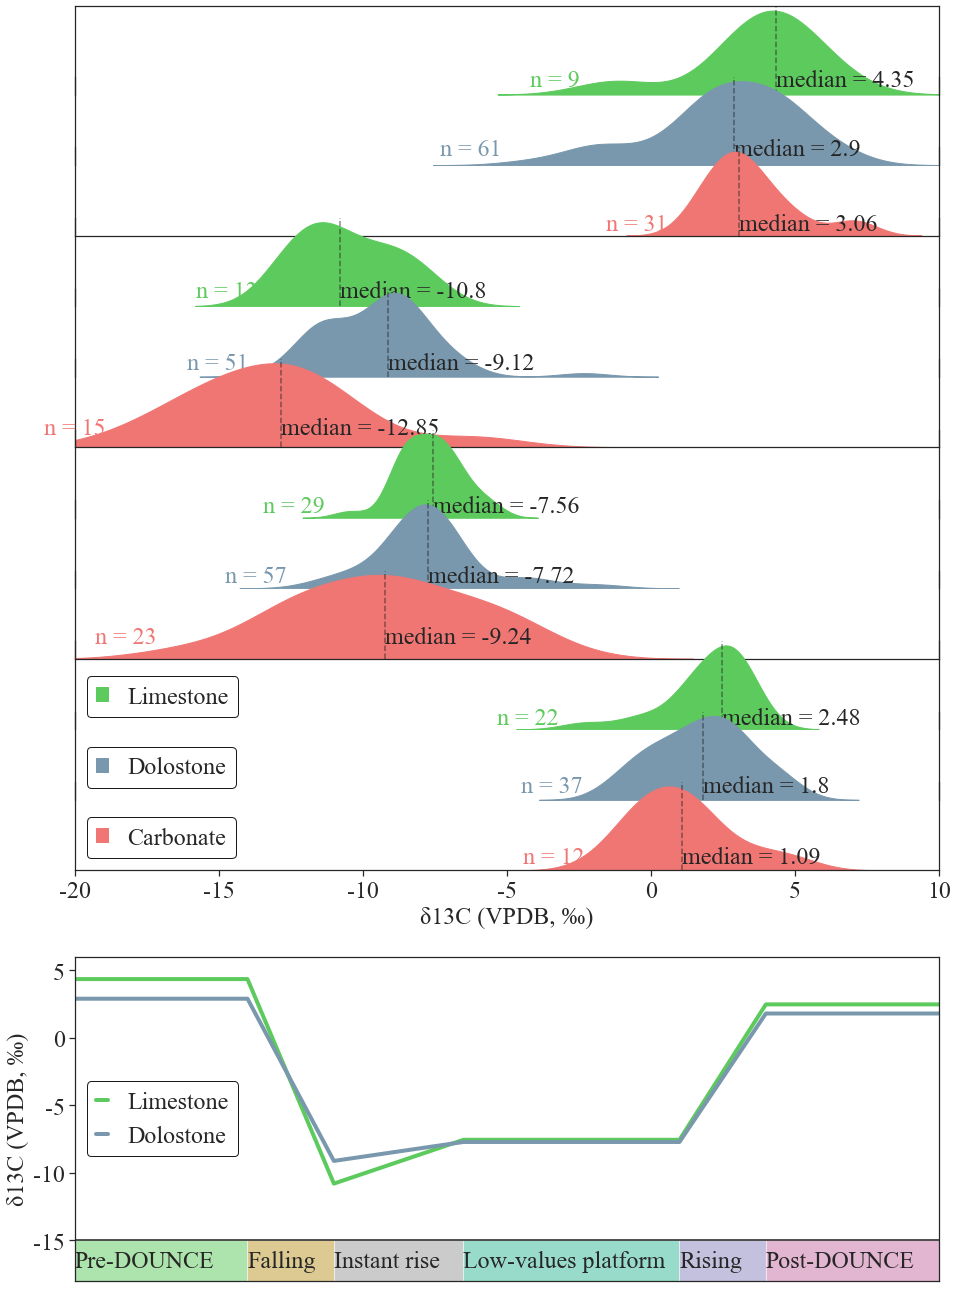

In [103]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_excel('./Database/DOUNCE_advanced_summary.xlsx')

figure = plt.figure(figsize=(15, 15))
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.size'] = 24

Lithology = ['Limestone', 'Dolostone', 'Carbonate']
# each color represent each continents, continents in the same paleoWater_depth zone are assigned with the same color
Colors = ['#5DCA5D', '#7998AD', '#F07673']
# Trasparent degree to distinguish different continents
Alpha = [1, 1, 1]

DOUNCE_stage = ['Pre_med', 'Lowest_C', 'Platform_med', 'Post_med']
Lithology_stage = [
    'Pre_lithology', 'Fall_lithology', 'Platform_lithology', 'Post_lithology'
]

Lithology = ['Limestone', 'Dolostone', 'Carbonate']

Limestone = []
Dolostone = []
Carbonate = []

for stage_value, lith_stage in zip(DOUNCE_stage, Lithology_stage):
    for lithology, color1, alpha1 in zip(Lithology, Colors, Alpha):
        id_stage = DOUNCE_stage.index(stage_value)
        id_lith = Lithology.index(lithology)

        plot_id = (id_stage) * len(Lithology) + (id_lith + 1)

        fig = plt.subplot(len(DOUNCE_stage) * len(Lithology), 1, plot_id)

        if plot_id == 1:
            fig.spines['bottom'].set_visible(False)
            fig.patch.set_visible(False)
            fig.grid(color='k', linestyle='--')
            plt.yticks([])
            plt.xticks([])
        elif plot_id == len(DOUNCE_stage) * len(Lithology):
            fig.spines['top'].set_visible(False)
            fig.patch.set_visible(False)
            plt.yticks([])
            plt.xticks([-20, -15, -10, -5, 0, 5, 10], fontsize=24)

        elif int(plot_id) % len(Lithology) == 0:

            fig.spines['top'].set_visible(False)
            fig.patch.set_visible(False)
            fig.grid(color='k', linestyle='--')
            plt.yticks([])
            plt.xticks([])
        else:
            fig.patch.set_visible(False)
            fig.spines['top'].set_visible(False)
            fig.spines['bottom'].set_visible(False)
            fig.patch.set_visible(False)
            fig.grid(color='k', linestyle='--')
            plt.yticks([])
            plt.xticks([])

        # different lithologhy ranges here. For pre-DOUNCE_stage only use the pre-DOUCNE lithology values
        data_plot = data[data['Lithology'] ==
                         lithology][stage_value].dropna().values

        sns.kdeplot(data_plot,
                    fill=True,
                    alpha=alpha1,
                    color=color1,
                    label=lithology)

        plt.axvline(x=np.median(data_plot),
                    linestyle='--',
                    color='k',
                    alpha=0.5)

        plt.text(round(np.median(data_plot), 2),
                 .02,
                 'median = ' + str(round(np.median(data_plot), 2)),
                 fontsize=24)

        vars()[Lithology[id_lith]].append(np.median(data_plot))

        plt.text(round(np.min(data_plot) - 3, 2),
                 .02,
                 'n = ' + str(len(data_plot)),
                 fontsize=24,
                 color=color1,
                 alpha=alpha1)
        fig.set_xlim(-20, 10)
        if plot_id >= len(DOUNCE_stage) * len(Lithology) - len(Lithology) + 1:
            plt.legend(fontsize=24,
                       loc='lower left',
                       framealpha=1,
                       edgecolor='k',
                       handlelength=0.5,
                       handleheight=0.5)

plt.xlabel('δ13C (VPDB, ‰)', fontsize=24)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.1,
                    hspace=-0.2)

stages_portions = [0, 0.2, 0.3, 0.45, 0.7, 0.8, 1.0]

ax2 = figure.add_axes([0.1, -0.28, 0.8, 0.3])

for depth_va, color in zip(Lithology, Colors):

    id_depth_va = Lithology.index(depth_va)

    # copy the platform values
    vars()[depth_va].insert(2, vars()[depth_va][2])

    # copy the pre values
    vars()[depth_va].insert(0, vars()[depth_va][0])

    # copy the post values
    vars()[depth_va].insert(-1, vars()[depth_va][-1])

    if depth_va != 'Carbonate':
        ax2.plot(stages_portions,
                 vars()[depth_va],
                 color=color,
                 linestyle='-',
                 linewidth=4,
                 label=Lithology[id_depth_va])

ax2.set_xlim(0, 1)
ax2.set_ylim(-18, 6)
ax2.legend(fontsize=24,
           loc='center left',
           framealpha=1,
           edgecolor='k',
           handlelength=0.5,
           handleheight=0.5)
ax2.set_ylabel('δ13C (VPDB, ‰)', fontsize=24)
plt.yticks([-15, -10, -5, 0, 5], fontsize=24)
plt.xticks([])

# stage range colors
stage_colors = [
    '#5DCA5D', '#BB9727', '#999999', '#32B897', '#8984BF', '#C76DA2'
]
stage_name = [
    'Pre-DOUNCE', "Falling", "Instant rise", 'Low-values platform', 'Rising',
    'Post-DOUNCE'
]
for stage_id in range(len(stages_portions) - 1):
    ax2.fill_between(
        [stages_portions[stage_id], stages_portions[stage_id + 1]],
        -18,
        -15,
        facecolor=stage_colors[stage_id],
        alpha=0.5)
    ax2.text(stages_portions[stage_id], -17, stage_name[stage_id], fontsize=24)

ax2.axhline(y=-15, xmin=0, xmax=1, linestyle='-', color='k')

plt.savefig('./Database/C_isotopes_figures/C_iso_KDE_Lith.pdf',
            format='pdf',
            bbox_inches='tight')

## C isotopes distributions in each DOUNCE stage with different continents

/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ygzhang/opt/anaconda3/lib/python3.9/si

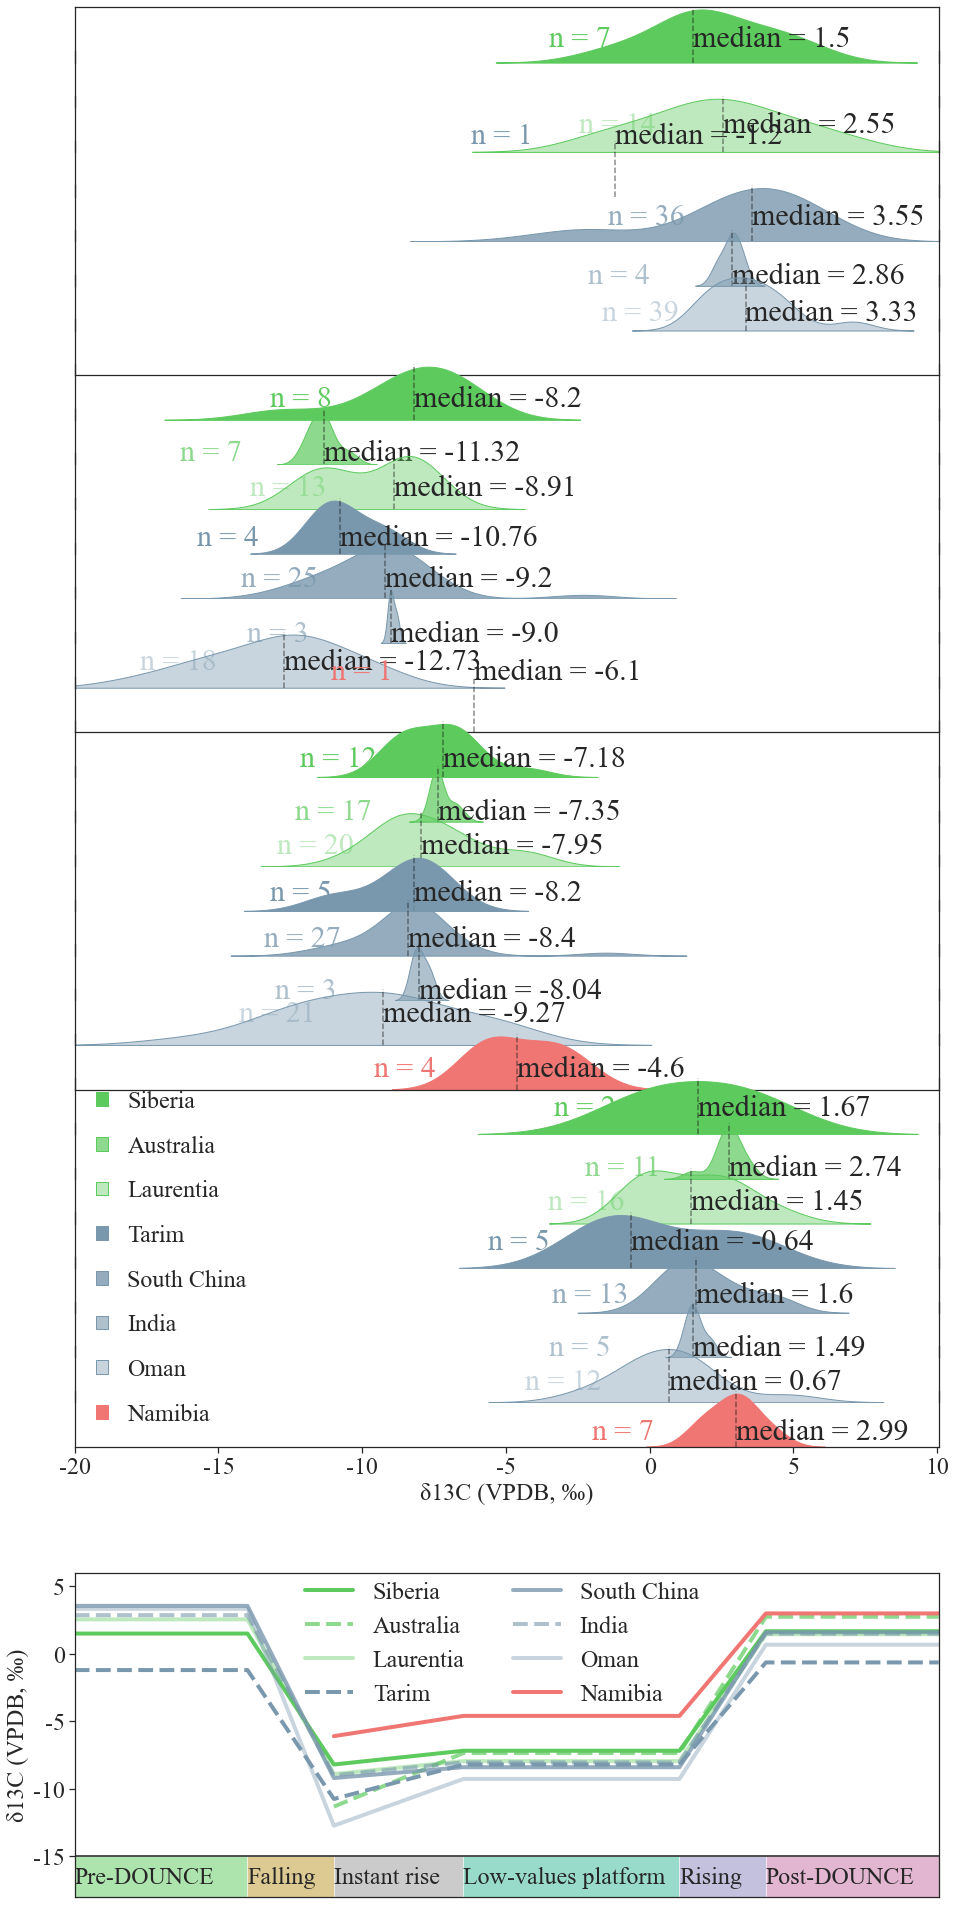

In [104]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_excel('./Database/DOUNCE_advanced_summary.xlsx')

figure = plt.figure(figsize=(15, 25))
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

Continents = [
    'Siberia', 'Australia', 'Laurentia', 'Tarim', 'South China', 'India',
    'Oman', 'Namibia'
]
#each color represent each continents, continents in the same paleolatitudes zone are assigned with the same color
Colors = [
    '#5DCA5D', '#5DCA5D', '#5DCA5D', '#7998AD', '#7998AD', '#7998AD',
    '#7998AD', '#F07673'
]
# Trasparent degree to distinguish different continents
Alpha = [1, 0.7, 0.4, 1, 0.8, 0.6, 0.4, 1]

DOUNCE_stage = ['Pre_med', 'Lowest_C', 'Platform_med', 'Post_med']

Continent_variable = [
    'Siberia', 'Australia', 'Laurentia', 'Tarim', 'South_China', 'India',
    'Oman', 'Namibia'
]

Siberia = []
Australia = []
Laurentia = []
Tarim = []
South_China = []
India = []
Oman = []
Namibia = []

for stage_value in DOUNCE_stage:
    for pcont, color1, alpha1 in zip(Continents, Colors, Alpha):
        id_stage = DOUNCE_stage.index(stage_value)
        id_pcont = Continents.index(pcont)

        plot_id = (id_stage) * len(Continents) + (id_pcont + 1)

        fig = plt.subplot(len(DOUNCE_stage) * len(Continents), 1, plot_id)

        if plot_id == 1:
            fig.spines['bottom'].set_visible(False)
            fig.patch.set_visible(False)
            fig.grid(color='k', linestyle='--')
            plt.yticks([])
            plt.xticks([])
        elif plot_id == len(DOUNCE_stage) * len(Continents):
            fig.spines['top'].set_visible(False)
            fig.patch.set_visible(False)
            plt.yticks([])
            plt.xticks([-20, -15, -10, -5, 0, 5, 10], fontsize=24)

        elif int(plot_id) % len(Continents) == 0:

            fig.spines['top'].set_visible(False)
            fig.patch.set_visible(False)
            fig.grid(color='k', linestyle='--')
            plt.yticks([])
            plt.xticks([])
        else:
            fig.patch.set_visible(False)
            fig.spines['top'].set_visible(False)
            fig.spines['bottom'].set_visible(False)
            fig.patch.set_visible(False)
            plt.yticks([])
            plt.xticks([])

        data_plot = data[data['Pcont'] == pcont][stage_value].dropna().values

        sns.kdeplot(data_plot,
                    fill=True,
                    alpha=alpha1,
                    color=color1,
                    label=pcont)

        vars()[Continent_variable[id_pcont]].append(np.median(data_plot))

        plt.axvline(x=np.median(data_plot),
                    linestyle='--',
                    color='k',
                    alpha=0.5)

        plt.text(round(np.median(data_plot), 2),
                 .05,
                 'median = ' + str(round(np.median(data_plot), 2)),
                 fontsize=30)
        plt.text(round(np.median(data_plot), 2) - 5,
                 .05,
                 'n = ' + str(len(data_plot)),
                 fontsize=30,
                 color=color1,
                 alpha=alpha1)
        fig.set_xlim(-20, 10.05)
        if plot_id >= len(DOUNCE_stage) * len(Continents) - len(
                Continents) + 1:
            plt.legend(fontsize=24,
                       loc='lower left',
                       frameon=False,
                       handlelength=0.5,
                       handleheight=0.5)

plt.xlabel('δ13C (VPDB, ‰)', fontsize=24)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.1,
                    hspace=-0.2)

stages_portions = [0, 0.2, 0.3, 0.45, 0.7, 0.8, 1.0]

ax2 = figure.add_axes([0.1, -0.15, 0.8, 0.18])

line_style = ['-', '--', '-', '--', '-', '--', '-', '-']

for pcont, color, alpha1 in zip(Continent_variable, Colors, Alpha):

    id_pcont = Continent_variable.index(pcont)

    # copy the platform values
    vars()[pcont].insert(2, vars()[pcont][2])

    # copy the pre values
    vars()[pcont].insert(0, vars()[pcont][0])

    # copy the post values
    vars()[pcont].insert(-1, vars()[pcont][-1])

    ax2.plot(stages_portions,
             vars()[pcont],
             color=color,
             linestyle=line_style[id_pcont],
             linewidth=4,
             alpha=alpha1,
             label=Continents[id_pcont])

ax2.set_xlim(0, 1)
ax2.set_ylim(-18, 6)
ax2.legend(bbox_to_anchor=(0.42, 0.76, 0.15, 0.25),
           fontsize=24,
           loc='upper center',
           frameon=False,
           borderpad=0,
           ncol=2)
ax2.set_ylabel('δ13C (VPDB, ‰)', fontsize=24)
plt.yticks([-15, -10, -5, 0, 5], fontsize=24)
plt.xticks([])

# stage range colors
stage_colors = [
    '#5DCA5D', '#BB9727', '#999999', '#32B897', '#8984BF', '#C76DA2'
]
stage_name = [
    'Pre-DOUNCE', "Falling", "Instant rise", 'Low-values platform', 'Rising',
    'Post-DOUNCE'
]
for stage_id in range(len(stages_portions) - 1):
    ax2.fill_between(
        [stages_portions[stage_id], stages_portions[stage_id + 1]],
        -18,
        -15,
        facecolor=stage_colors[stage_id],
        alpha=0.5)
    ax2.text(stages_portions[stage_id], -17, stage_name[stage_id], fontsize=24)

ax2.axhline(y=-15, xmin=0, xmax=1, linestyle='-', color='k')

figure.savefig('./Database/C_isotopes_figures/C_iso_Contin.pdf',
               format='pdf',
               bbox_inches='tight')

## Lithology variations over the DOUNCE stages

[60.4, 61.1, 31.7, 34.9, 33.3, 45.1]
[8.9, 11.1, 45.0, 43.1, 52.5, 35.2]
[69.2, 68.2, 50.0, 53.3, 50.0, 46.9]
[7.7, 9.1, 25.0, 26.7, 35.0, 34.4]
[51.9, 56.2, 28.0, 33.3, 23.5, 57.1]
[5.8, 7.8, 48.0, 41.2, 67.6, 28.6]
[70.0, 61.1, 21.1, 17.9, 20.0, 27.8]
[30.0, 27.8, 57.9, 64.3, 60.0, 44.4]


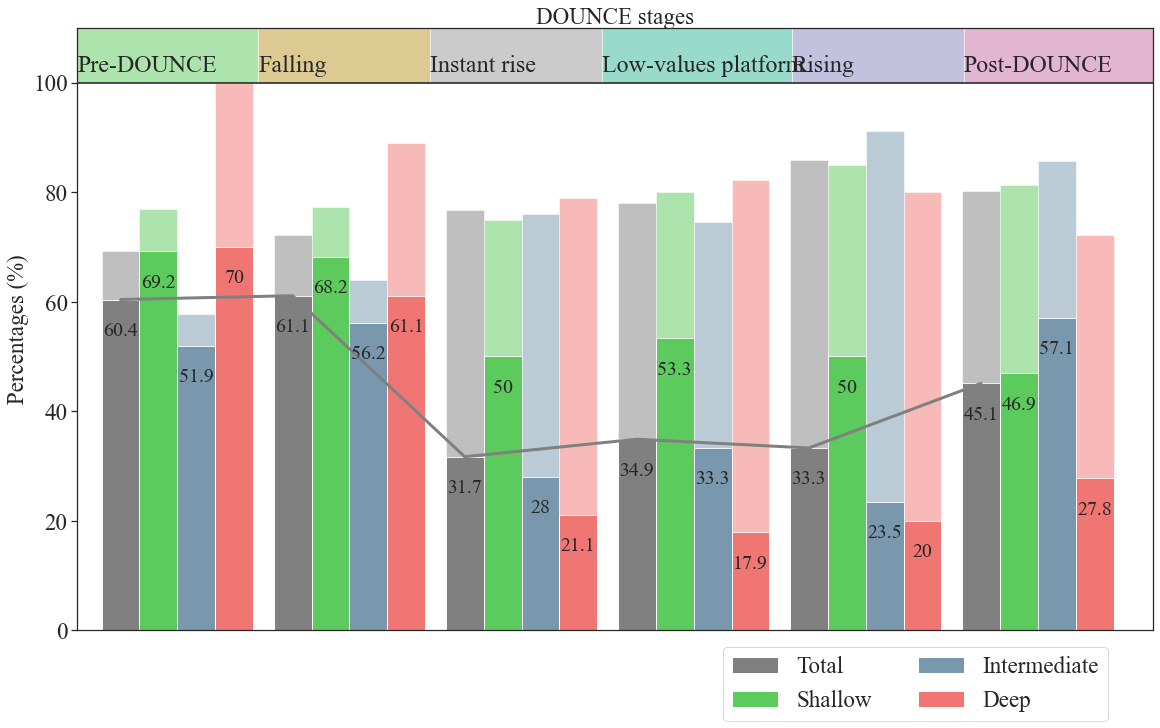

In [100]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter

data = pd.read_excel('./Database/DOUNCE_advanced_summary.xlsx')


Stages = ['Pre_lithology', 'Fall_lithology', 'Plat_rising_lithology',
       'Platform_lithology', 'Rising_lithology', 'Post_lithology',]

Water_depth = ['Shallow', 'Intermediate', 'Deep']

dict_water1 = {}
dict_water2 = {}


Dolo_percent = [];
Lime_percent = [];
for stage in Stages:
    Count_lithology = Counter(list(data[stage]))
    Total_counts = Count_lithology['Dolostone'] + Count_lithology['Limestone'] + Count_lithology['Carbonate']
    Dolo_percet = Count_lithology['Dolostone'] / Total_counts * 100
    Lime_percet = Count_lithology['Limestone'] / Total_counts * 100
    Dolo_percent.append(round(Dolo_percet,1))
    Lime_percent.append(round(Lime_percet,1))
dict_water1['Total'] = Dolo_percent
dict_water2['Total'] = Lime_percent

for depth in Water_depth:
    data_depth = data[data['Water_depth'] == depth]
    Dolo_percent = [];
    Lime_percent = [];
    for stage in Stages:
        Count_lithology = Counter(list(data_depth[stage]))
        Total_counts = Count_lithology['Dolostone'] + Count_lithology['Limestone'] + Count_lithology['Carbonate']
        Dolo_percet = Count_lithology['Dolostone'] / Total_counts * 100
        Lime_percet = Count_lithology['Limestone'] / Total_counts * 100
        Dolo_percent.append(round(Dolo_percet,1))
        Lime_percent.append(round(Lime_percet,1))
    dict_water1[depth] = Dolo_percent
    dict_water2[depth] = Lime_percent

x = np.arange(len(Stages))
width = 0.22
multiplier = 0

fontsize = 23
fig, ax = plt.subplots(figsize = (16, 10),layout='constrained')
plt.rcParams['font.sans-serif'] =['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
colors = ['#808080','#5DCA5D', '#7998AD','#F07673']


for (attribute, measurement),(attribute2, measurement2),color in zip(dict_water1.items(), dict_water2.items(),colors):
    print(measurement)
    print(measurement2)
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, color = color,label=attribute)
    
    rects2 = ax.bar(x + offset, measurement2, width, color = color, bottom= measurement, alpha = 0.5)
    if attribute == 'Total':
        ax.plot(x + offset, measurement, linestyle = '-',linewidth = 3, color = color)
    ax.bar_label(rects, padding=-40, fontsize = fontsize - 3)
    
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentages (%)', fontsize = fontsize)

ax.xaxis.set_label_position('top')
ax.set_xlabel('DOUNCE stages', fontsize = fontsize)

ax.set_yticks([0, 20, 40, 60, 80, 100],[0, 20, 40, 60, 80, 100],fontsize = fontsize)
ax.set_xticks([])
ax.legend(loc= (0.6, -0.15), fontsize = fontsize, ncol = 2)
ax.set_ylim(0, 110)

# stage range colors
stage_colors = [
    '#5DCA5D', '#BB9727', '#999999', '#32B897', '#8984BF', '#C76DA2'
]
stage_name = [
    'Pre-DOUNCE', "Falling", "Instant rise", 'Low-values platform', 'Rising',
    'Post-DOUNCE'
]
stages_portions = [-0.25, 0.8, 1.8, 2.8, 3.9, 4.9, 6]
ax.set_xlim(-0.25, 6)

for stage_id in range(len(stages_portions) - 1):
    ax.fill_between(
        [stages_portions[stage_id], stages_portions[stage_id + 1]],
        100,
        110,
        facecolor=stage_colors[stage_id],
        alpha=0.5)
    ax.text(stages_portions[stage_id], 102, stage_name[stage_id], fontsize=24)
    

ax.axhline(y=100, xmin=0, xmax=1, linestyle='-', color='k')

plt.savefig('./Database/C_isotopes_figures/lith_percentages.pdf', format ='pdf')

# Mathematics Calculations: Number counts, Chi2, Wilconx

## count the number of carbon isotopes (unomitted and omitted)

In [105]:
import pandas as pd
import os
import numpy as np

DATA_directory = './Database/C_isotopes/'

entry_list = []
for file in os.listdir(DATA_directory):
    if str(file).endswith('.xlsx'):
        entry_list.append(int(str(file)[:-5]))
        
# print(excel_list)
output = pd.DataFrame(columns=['net number', 'gross number'], index = entry_list)
for excel in entry_list:
    data = pd.read_excel(DATA_directory + str(excel) + '.xlsx')
    output.loc[excel,'gross number'] = len(data['d13C'].dropna())
    
    d13C = data[data['DOUNCE zone'] != 'Omit']['d13C'].dropna()
    output.loc[excel,'net number'] = len(d13C)

output.sort_index().to_excel('./Database/C_isotope_number_summary.xlsx')

Reference numbers

In [2]:
import pandas as pd
from collections import Counter
DOUNCE_summary = pd.read_excel('./Database/DOUNCE_advanced_summary.xlsx')
Refe = Counter(
    list(DOUNCE_summary['Reference']))
print(Refe.keys())
print(len(Refe.keys()))

dict_keys(['Husson et al. (2015)', 'Husson et al. (2012)', 'Calver (2000)', 'Wang et al. (2016)', 'Zhou et al. (2012)', 'Tahata et al. (2013)', 'Zhu et al. (2007)', 'Lu et al. (2013)', 'Burns and Matter (1993)', 'Burns et al. (1994)', 'Pokrovskii et al. (2006)', 'Moynihan et al. (2019)', 'Wang et al. (2014)', 'Wood et al. (2015)', 'Wang et al. (2022)', 'Rugen et al. (2022) & Willman et al. (2020)', 'Zhou et al. (2017)', 'Zhu et al. (2013)', 'Busch et al. (2022)', 'Loyd et al. (2012) & Hardisty et al. (2017)', 'Wang et al. (2023)', 'Li et al. (2017)', 'Melezhik et al. (2009)', 'Wang et al. (2020)', 'Cañadas et al. (2022)', 'Fike at al. (2006)', 'Bergmann at al. (2011)', 'Rooney et al. (2020)', 'Macdonald et al. (2013)', 'Osburn et al. (2013)', 'Pokrovsky et al. (2012)', 'Verdel et al. (2011)', 'McFadden et al. (2008)', 'Fike et al. (2008)', 'Yang et al. (2021)', 'Kaufman et al. (2006)', 'Corsetti et al. (2003) & Kaufman et al. (2007)', 'Corsetti et al. (2003)', 'Kaufman et al. (2007)', 

## summary the number of each DOUNCE zone in each category 

paleolatitude, paleo continents, water depth, lithology, fall lithology, plat_rising lithology, lithology of lowest

In [107]:
## summary the counts of DOUNCE zones in each catagory: paleolatitude, lithology, water depth, paleo continents
import pandas as pd

LIST = pd.read_excel('./Database/DOUNCE_advanced_summary.xlsx')

Group_list = ['PaleoLati','Pcont','Water_depth','Lithology','Fall_lithology', 'Plat_rising_lithology', 'Lithology_of_lowest']

writer = pd.ExcelWriter('./Database/Table_summary.xlsx', engine= 'xlsxwriter')

for group_variable in Group_list:
    
    Groupby_list = LIST.groupby(group_variable)
    

    Table = pd.DataFrame(columns=list(Groupby_list.groups.keys()), index=[
                         'Pre', 'Falling', 'Plat_rising', 'Platform', 'Rising', 'Post', 'Total'])

    
    for group in Groupby_list.groups.keys():

        vars()[group] = LIST.iloc[list(Groupby_list.groups[group]), :]
        

        # 0:6 --- Pre_med to Post_med
        summary = vars()[group].describe().iloc[0,:6]
        
        # -1. ST --- Can be considered as the total number since the values are always filled
        total  = vars()[group].describe().iloc[0,-1]
        
        summary["Total"] = total

        
        Table[group] = summary.values
        
        

    Table = Table.T
    
    # move the total column into the first column in the summary

    new_summary = pd.concat([Table.loc[:,'Total'], Table.iloc[:,:-1]], axis = 1)

    print(new_summary)
    
    new_summary.to_excel(writer, sheet_name = group_variable)

writer.close()

         Total   Pre  Falling  Plat_rising  Platform  Rising  Post
30-0°N    61.0  20.0     36.0         34.0      54.0    43.0  32.0
30-0°S    94.0  79.0     87.0         24.0      49.0    45.0  32.0
60-30°S   11.0   2.0      3.0          2.0       6.0    11.0   7.0
             Total   Pre  Falling  Plat_rising  Platform  Rising  Post
Australia     17.0   0.0      7.0         15.0      17.0    17.0  11.0
India          5.0   4.0      5.0          0.0       3.0     5.0   5.0
Laurentia     27.0  14.0     18.0         14.0      20.0    19.0  16.0
Namibia        9.0   0.0      1.0          1.0       4.0     9.0   7.0
Oman          46.0  39.0     40.0         12.0      21.0    15.0  12.0
Siberia       13.0   7.0      9.0          3.0      12.0     5.0   2.0
South China   44.0  36.0     42.0         12.0      27.0    24.0  13.0
Tarim          5.0   1.0      4.0          3.0       5.0     5.0   5.0
              Total   Pre  Falling  Plat_rising  Platform  Rising  Post
Deep           33.0  

## Chi2 test for the relationship of the existence of plat_rising stage with each category

In [108]:
import pandas as pd
from scipy import stats

Group_list = ['PaleoLati','Pcont','Water_depth','Lithology','Fall_lithology', 'Plat_rising_lithology']

writer = pd.ExcelWriter('./Database/Chi2_summary.xlsx', engine= 'xlsxwriter')

for sheet in Group_list:
    
    dataout = pd.DataFrame(columns= ['Grouping categories', 'Plat rise observed', 'Plat rise expected', 'Chi2 test results'])
    
    data = pd.read_excel('./Database/Table_summary.xlsx',sheet_name= sheet, index_col= 0)
    
    data_for_chi = data[['Plat_rising','Platform']]
    
    print(data_for_chi)
    
    chi2, p, dof, expected = stats.chi2_contingency(data_for_chi)
    
    dataout['Plat rise observed'] = data['Plat_rising']
    
    dataout['Grouping categories'] = sheet
    
    dataout['Plat rise expected'] = expected[:,0]
    
    dataout['Chi2 test results'] = str(chi2) + '\n p = ' + str(p) + '\n df = ' + str(dof)
    
    dataout.to_excel(writer, sheet_name= sheet)
    
writer.close()

         Plat_rising  Platform
30-0°N            34        54
30-0°S            24        49
60-30°S            2         6
             Plat_rising  Platform
Australia             15        17
India                  0         3
Laurentia             14        20
Namibia                1         4
Oman                  12        21
Siberia                3        12
South China           12        27
Tarim                  3         5
              Plat_rising  Platform
Deep                   19        28
Intermediate           25        51
Shallow                16        30
           Plat_rising  Platform
Carbonate           15        23
Dolostone           27        57
Limestone           18        29
           Plat_rising  Platform
Carbonate            8        14
Dolostone           25        50
Limestone            8        13
           Plat_rising  Platform
Carbonate           14        12
Dolostone           19        19
Limestone           27        27


## Wilconxon test to show if the data distributions are significantly distinguished

In [109]:
import pandas as pd
import numpy as np
from scipy.stats import ranksums



data = pd.read_excel('./Database/DOUNCE_advanced_summary.xlsx')

#paleolatitude
PaleoLati = ['30-0°N', '30-0°S', '60-30°S']
#paleo continents
Pcont = ['Australia', 'South China', 'Oman', 'Siberia', 'Laurentia', 'Namibia', 'Tarim', 'India']
#paleo water depth
Water_depth = ['Shallow', 'Intermediate', 'Deep']
#lithology
Lithology = ['Limestone', 'Dolostone', 'Carbonate']

#lithology of falling
Fall_lithology = ['Limestone', 'Dolostone', 'Carbonate']
Plat_rising_lithology = ['Limestone', 'Dolostone', 'Carbonate']
Pre_lithology = ['Limestone', 'Dolostone', 'Carbonate']
Platform_lithology = ['Limestone', 'Dolostone', 'Carbonate']
Post_lithology = ['Limestone', 'Dolostone', 'Carbonate']

### change the fall lithology to fall_lithology to create variables in this script
labels = ['PaleoLati', 'Pcont','Water_depth', 'Lithology', 'Fall_lithology', 'Plat_rising_lithology' , 'Pre_lithology', 'Platform_lithology', 'Post_lithology']



### ST falling 

In [110]:

writer = pd.ExcelWriter('./Database/Table_summary_Wilconxon_ST_falling.xlsx', engine= 'xlsxwriter')

for label in labels:
    Paleo_order = vars()[label]
    # statistic
    data_out = pd.DataFrame(columns=Paleo_order, index = Paleo_order)
    # p values
    data_out2 = pd.DataFrame(columns=Paleo_order, index = Paleo_order)
    
    # median C isotope values
    data_out3 = pd.DataFrame(columns=Paleo_order, index = [0])

    for paleolati1 in Paleo_order:
        data3 = data[data[label] == paleolati1]['ST_Falling'].dropna()
            
        data_out3.loc[0,paleolati1] = np.median(data3)
        
        for paleolati2 in Paleo_order:
            data1 = data[data[label] == paleolati1]['ST_Falling'].dropna()

            data2 = data[data[label] == paleolati2]['ST_Falling'].dropna()

            wilconxon = ranksums(data1, data2)

            data_out.loc[paleolati1, paleolati2] = wilconxon[0]

            data_out2.loc[paleolati1, paleolati2] = wilconxon[1]

    data_out3.to_excel(writer, sheet_name= label)
    
    data_out2.to_excel(writer, sheet_name= label + '_p')
    
writer.close()


/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:7784: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


### ST

In [111]:

writer = pd.ExcelWriter('./Database/Table_summary_Wilconxon_ST.xlsx', engine= 'xlsxwriter')

for label in labels:
    Paleo_order = vars()[label]
    # statistic
    data_out = pd.DataFrame(columns=Paleo_order, index = Paleo_order)
    # p values
    data_out2 = pd.DataFrame(columns=Paleo_order, index = Paleo_order)
    
    
    # median C isotope values
    data_out3 = pd.DataFrame(columns=Paleo_order, index = [0])

    for paleolati1 in Paleo_order:
        data3 = data[data[label] == paleolati1]['ST'].dropna()
            
        data_out3.loc[0,paleolati1] =  np.median(data3)
        for paleolati2 in Paleo_order:
            data1 = data[data[label] == paleolati1]['ST'].dropna()

            data2 = data[data[label] == paleolati2]['ST'].dropna()
        

            wilconxon = ranksums(data1, data2)

            data_out.loc[paleolati1, paleolati2] = wilconxon[0]

            data_out2.loc[paleolati1, paleolati2] = wilconxon[1]

    data_out3.to_excel(writer, sheet_name= label)
    data_out2.to_excel(writer, sheet_name= label + '_p')
writer.close()



### DOUNCE magnitudes

In [112]:
writer = pd.ExcelWriter('./Database/Table_summary_Wilconxon_magnitude.xlsx', engine= 'xlsxwriter')

data = data[data['Mag_cal_method'] == 'Pre-LOWEST']
data = data[data['Magnitude'] > 0]

for label in labels:
    Paleo_order = vars()[label]
    # statistic
    data_out = pd.DataFrame(columns=Paleo_order, index = Paleo_order)
    # p values
    data_out2 = pd.DataFrame(columns=Paleo_order, index = Paleo_order)
    # median C isotope values
    data_out3 = pd.DataFrame(columns=Paleo_order, index = [0])

    for paleolati1 in Paleo_order:
        data3 = data[data[label] == paleolati1]['Magnitude'].dropna()
            
        data_out3.loc[0,paleolati1] = np.median(data3)
        for paleolati2 in Paleo_order:
            data1 = data[data[label] == paleolati1]['Magnitude'].dropna()

            data2 = data[data[label] == paleolati2]['Magnitude'].dropna()

            wilconxon = ranksums(data1, data2)

            data_out.loc[paleolati1, paleolati2] = wilconxon[0]

            data_out2.loc[paleolati1, paleolati2] = wilconxon[1]

    data_out3.to_excel(writer, sheet_name= label)
    data_out2.to_excel(writer, sheet_name= label + '_p')
writer.close()

/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:7784: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


### Pre median

In [113]:

import pandas as pd
import numpy as np
from scipy.stats import ranksums



data = pd.read_excel('./Database/DOUNCE_advanced_summary.xlsx')

#paleolatitude
PaleoLati = ['30-0°N', '30-0°S', '60-30°S']
#paleo continents
Pcont = ['Australia', 'South China', 'Oman', 'Siberia', 'Laurentia', 'Namibia', 'Tarim', 'India']
#paleo water depth
Water_depth = ['Shallow', 'Intermediate', 'Deep']
#lithology
Lithology = ['Limestone', 'Dolostone', 'Carbonate']

#lithology of falling
Fall_lithology = ['Limestone', 'Dolostone', 'Carbonate']
Plat_rising_lithology = ['Limestone', 'Dolostone', 'Carbonate']
Pre_lithology = ['Limestone', 'Dolostone', 'Carbonate']
Platform_lithology = ['Limestone', 'Dolostone', 'Carbonate']
Post_lithology = ['Limestone', 'Dolostone', 'Carbonate']

### change the fall lithology to fall_lithology to create variables in this script
labels = ['PaleoLati', 'Pcont','Water_depth', 'Lithology', 'Fall_lithology', 'Plat_rising_lithology' , 'Pre_lithology', 'Platform_lithology', 'Post_lithology']

writer = pd.ExcelWriter('./Database/Table_summary_Wilconxon_Pre_median.xlsx', engine= 'xlsxwriter')
for label in labels:
    Paleo_order = vars()[label]
    # statistic
    data_out = pd.DataFrame(columns=Paleo_order, index = Paleo_order)
    # p values
    data_out2 = pd.DataFrame(columns=Paleo_order, index = Paleo_order)

    data_out3 = pd.DataFrame(columns=Paleo_order, index = [0])

    for paleolati1 in Paleo_order:
        data3 = data[data[label] == paleolati1]['Pre_med'].dropna()
            
        data_out3.loc[0,paleolati1] =  np.median(data3)
        for paleolati2 in Paleo_order:
            data1 = data[data[label] == paleolati1]['Pre_med'].dropna()

            data2 = data[data[label] == paleolati2]['Pre_med'].dropna()


            wilconxon = ranksums(data1, data2)
            
            data_out.loc[paleolati1, paleolati2] = wilconxon[0]

            data_out2.loc[paleolati1, paleolati2] = wilconxon[1]

    data_out3.to_excel(writer, sheet_name= label)
    
    data_out2.to_excel(writer, sheet_name= label + '_p')
writer.close()

/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ygzhang/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:7784: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


### Lowest carbon isotope values

In [114]:


writer = pd.ExcelWriter('./Database/Table_summary_Wilconxon_Lowest_C.xlsx', engine= 'xlsxwriter')

for label in labels:
    Paleo_order = vars()[label]
    # statistic
    data_out = pd.DataFrame(columns=Paleo_order, index = Paleo_order)
    # p values
    data_out2 = pd.DataFrame(columns=Paleo_order, index = Paleo_order)

    data_out3 = pd.DataFrame(columns=Paleo_order, index = [0])

    for paleolati1 in Paleo_order:
        data3 = data[data[label] == paleolati1]['Lowest_C'].dropna()
            
        data_out3.loc[0,paleolati1] =  np.median(data3)
        for paleolati2 in Paleo_order:
            data1 = data[data[label] == paleolati1]['Lowest_C'].dropna()

            data2 = data[data[label] == paleolati2]['Lowest_C'].dropna()

            wilconxon = ranksums(data1, data2)

            data_out.loc[paleolati1, paleolati2] = wilconxon[0]

            data_out2.loc[paleolati1, paleolati2] = wilconxon[1]

    data_out3.to_excel(writer, sheet_name= label)
    data_out2.to_excel(writer, sheet_name= label + '_p')
writer.close()

### Platform medians

In [115]:

writer = pd.ExcelWriter('./Database/Table_summary_Wilconxon_Platform_med.xlsx', engine= 'xlsxwriter')

for label in labels:
    Paleo_order = vars()[label]
    # statistic
    data_out = pd.DataFrame(columns=Paleo_order, index = Paleo_order)
    # p values
    data_out2 = pd.DataFrame(columns=Paleo_order, index = Paleo_order)

    data_out3 = pd.DataFrame(columns=Paleo_order, index = [0])

    for paleolati1 in Paleo_order:
        data3 = data[data[label] == paleolati1]['Platform_med'].dropna()
            
        data_out3.loc[0,paleolati1] =  np.median(data3)
        for paleolati2 in Paleo_order:
            data1 = data[data[label] == paleolati1]['Platform_med'].dropna()

            data2 = data[data[label] == paleolati2]['Platform_med'].dropna()

            wilconxon = ranksums(data1, data2)

            data_out.loc[paleolati1, paleolati2] = wilconxon[0]

            data_out2.loc[paleolati1, paleolati2] = wilconxon[1]

    data_out3.to_excel(writer, sheet_name= label)
    data_out2.to_excel(writer, sheet_name= label + '_p')
writer.close()

### Post medians

In [116]:

writer = pd.ExcelWriter('./Database/Table_summary_Wilconxon_Post_med.xlsx', engine= 'xlsxwriter')

for label in labels:
    Paleo_order = vars()[label]
    # statistic
    data_out = pd.DataFrame(columns=Paleo_order, index = Paleo_order)
    # p values
    data_out2 = pd.DataFrame(columns=Paleo_order, index = Paleo_order)
    data_out3 = pd.DataFrame(columns=Paleo_order, index = [0])

    for paleolati1 in Paleo_order:
        data3 = data[data[label] == paleolati1]['Post_med'].dropna()
            
        data_out3.loc[0,paleolati1] =  np.median(data3)
        
        for paleolati2 in Paleo_order:
            data1 = data[data[label] == paleolati1]['Post_med'].dropna()

            data2 = data[data[label] == paleolati2]['Post_med'].dropna()

            wilconxon = ranksums(data1, data2)

            data_out.loc[paleolati1, paleolati2] = wilconxon[0]

            data_out2.loc[paleolati1, paleolati2] = wilconxon[1]

    data_out3.to_excel(writer, sheet_name= label)
    
    data_out2.to_excel(writer, sheet_name= label + '_p')
writer.close()